In [2]:
import networkx as nx
# https://networkx.github.io/documentation/stable/reference/index.html
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
import random

# Dataset 

This dataset comes from a consulting firm. Emails exchanged during the period 4 to 19 March 2019. 1174928 lines

Each line describes what a collaborator sent or received at MessDate. S/he sent (Id_Direction is equal to 1) or received an email from a contact (Id_Direction is equal to 2).

The interlocutor can be interne/externe/unidentified (PartnerTypeName).

The interaction involving the collaborator is defined by:

- GroupName1 : Post/Title of the collaborator

- RecipientName : The collaborator

- MessSize : message size in Mégabytes

- MessDate : Date+Hour

- Id_Direction : 1 for a sent email, 2 for a received email

- PartnerTypeName : the interlocutor may be either:      

 -        Interne
 -        Internet (external interlocutor)
 -        Unidentified local address (applications or server or cloud mail address)

- PartnerName : domain name if external interlocutor

- Recipient_Display : the interlocutor





In [3]:
df = pd.read_csv('dataset/part1/dataset_UE_GTSNA.csv', sep=',')
df


C:\Users\souma\AppData\Local\Temp\ipykernel_53708\3875577785.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/part1/dataset_UE_GTSNA.csv', sep=',')


GroupName1             MessSize             MessDate  \
0                Senior  0,00990676879882813  04/03/2019 00:00:02   
1                Senior   0,0100250244140625  04/03/2019 00:00:02   
2               Manager   0,0445833206176758  04/03/2019 00:00:08   
3               Partner   0,0256938934326172  04/03/2019 00:00:13   
4               Partner   0,0256862640380859  04/03/2019 00:00:13   
...                 ...                  ...                  ...   
1174923           Staff     10,0752859115601  19/03/2019 23:59:33   
1174924  Senior Manager     5,76295566558838  19/03/2019 23:59:33   
1174925  Senior Manager     5,76295566558838  19/03/2019 23:59:33   
1174926           Staff     5,77865791320801  19/03/2019 23:59:40   
1174927         Manager   0,0284605026245117  19/03/2019 23:59:47   

                                          Subject  Id_Direction  \
0        0de420e8cb4f25a853b2d42c27787d8691176975             2   
1        43cbcc2246e28d855c636fae99bbd0dd828ac276             2   
2        a60173eae76ea9bc97aa2f1d84bf78797c77a1f5             2   
3        c0eee27f5bb484585a79c5d9a0646097937c0091             2   
4        c0eee27f5bb484585a79c5d9a0646097937c0091             2   
...                                           ...           ...   
1174923  a87260372529cbefc1f1fcb98fa344b623d8872f             2   
1174924  e07e8cec7f1fa3a230c8602bbad0bb04a4014514             1   
1174925  e07e8cec7f1fa3a230c8602bbad0bb04a4014514             1   
1174926  e07e8cec7f1fa3a230c8602bbad0bb04a4014514             2   
1174927  3956ebc309f0a29437623205213ed3f4cf0ba292             2   

                    PartnerTypeName  Id_Recipient  Id_Regroup  \
0                          Internal           852        6674   
1                          Internal           852        6674   
2                          Internet          1113      593252   
3        Unidentified local address          1888      552279   
4        Unidentified local address          1888      552279   
...                             ...           ...         ...   
1174923                    Internal       1173723        1685   
1174924                    Internal          1685     1173723   
1174925                    Internet          1685     1096276   
1174926                    Internal       1173723        1685   
1174927                    Internet          1737      554173   

                                     Partner_Name  \
0        6d2830b1e76dc7300fce6745176601827d233de8   
1        6d2830b1e76dc7300fce6745176601827d233de8   
2        3793d3935a39a8038a8a8b27e00c3aa587395412   
3        97db2e51f36c0b207c8f6a4ecb488473238d04ae   
4        97db2e51f36c0b207c8f6a4ecb488473238d04ae   
...                                           ...   
1174923  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174924  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174925  761ecb06a8977d424023dc4b444707794040552c   
1174926  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174927  d4e3a284f1205b13e7b2b45fb166c8341b277630   

                                Recipient_Display  \
0        0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
1        0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
2        77c570261748c351a2296ac47685450587bc7d2b   
3        4d48a3734ac25c0f71584f79716881f9529167f6   
4        4d48a3734ac25c0f71584f79716881f9529167f6   
...                                           ...   
1174923  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174924  ab721267b844d2c55730b7c6c1a738dfa7890046   
1174925  bd8fe6ef033d42c75abf6133e3bbe029faffc951   
1174926  27a0dafd0101f368a5881378aef66a1fa5403e38   
1174927  fc65ffcd942b1a53587d4567cfc1e74d1e3c0080   

                                   Recipient_Name  
0        b4b419cd95026fd7f74cc90754ec02f40de14d85  
1        b4b419cd95026fd7f74cc90754ec02f40de14d85  
2        bec1a496d58aefeb626da2e7484e38657704fa19  
3        253b86e279f1ca0520ed2d4aeffa491ce0054a1c  
4        253b86e279f1ca0520ed2d4aeffa491ce0054a1c  
...         

# Data Preparation (en amont)

In [4]:
df = df.reindex(columns=['Id_Direction', 'Id_Recipient', 'GroupName1', 'Recipient_Name','Recipient_Display','Id_Regroup','PartnerTypeName', 'Partner_Name', 'MessDate', 'MessSize', 'Subject'])
df.head()

Id_Direction  Id_Recipient GroupName1  \
0             2           852     Senior   
1             2           852     Senior   
2             2          1113    Manager   
3             2          1888    Partner   
4             2          1888    Partner   

                             Recipient_Name  \
0  b4b419cd95026fd7f74cc90754ec02f40de14d85   
1  b4b419cd95026fd7f74cc90754ec02f40de14d85   
2  bec1a496d58aefeb626da2e7484e38657704fa19   
3  253b86e279f1ca0520ed2d4aeffa491ce0054a1c   
4  253b86e279f1ca0520ed2d4aeffa491ce0054a1c   

                          Recipient_Display  Id_Regroup  \
0  0d0128c6ca8c4006d5c1d8e1694b3302380755ab        6674   
1  0d0128c6ca8c4006d5c1d8e1694b3302380755ab        6674   
2  77c570261748c351a2296ac47685450587bc7d2b      593252   
3  4d48a3734ac25c0f71584f79716881f9529167f6      552279   
4  4d48a3734ac25c0f71584f79716881f9529167f6      552279   

              PartnerTypeName                              Partner_Name  \
0                    Internal  6d2830b1e76dc7300fce6745176601827d233de8   
1                    Internal  6d2830b1e76dc7300fce6745176601827d233de8   
2                    Internet  3793d3935a39a8038a8a8b27e00c3aa587395412   
3  Unidentified local address  97db2e51f36c0b207c8f6a4ecb488473238d04ae   
4  Unidentified local address  97db2e51f36c0b207c8f6a4ecb488473238d04ae   

              MessDate             MessSize  \
0  04/03/2019 00:00:02  0,00990676879882813   
1  04/03/2019 00:00:02   0,0100250244140625   
2  04/03/2019 00:00:08   0,0445833206176758   
3  04/03/2019 00:00:13   0,0256938934326172   
4  04/03/2019 00:00:13   0,0256862640380859   

                                    Subject  
0  0de420e8cb4f25a853b2d42c27787d8691176975  
1  43cbcc2246e28d855c636fae99bbd0dd828ac276  
2  a60173eae76ea9bc97aa2f1d84bf78797c77a1f5  
3  c0eee27f5bb484585a79c5d9a0646097937c0091  
4  c0eee27f5bb484585a79c5d9a0646097937c0091

In [5]:
df.rename(columns={'Id_Regroup': 'Id_Interlocuteur', 'Id_Direction': 'Statut_Message (E=1 ou R=2)','Id_Recipient': 'Id_Collaborateur', 'GroupName1': 'Grade_Collobateur', 'Recipient_Name':'Target if Statut_Message=2, Sender otherwise', 'PartnerTypeName':'Statut_Interlocuteur', 'Partner_Name':'Domaine_Name','Recipient_Display':'Sender if Statut_Message=2, Target otherwise'}, inplace=True)
df.head()

Statut_Message (E=1 ou R=2)  Id_Collaborateur Grade_Collobateur  \
0                            2               852            Senior   
1                            2               852            Senior   
2                            2              1113           Manager   
3                            2              1888           Partner   
4                            2              1888           Partner   

  Target if Statut_Message=2, Sender otherwise  \
0     b4b419cd95026fd7f74cc90754ec02f40de14d85   
1     b4b419cd95026fd7f74cc90754ec02f40de14d85   
2     bec1a496d58aefeb626da2e7484e38657704fa19   
3     253b86e279f1ca0520ed2d4aeffa491ce0054a1c   
4     253b86e279f1ca0520ed2d4aeffa491ce0054a1c   

  Sender if Statut_Message=2, Target otherwise  Id_Interlocuteur  \
0     0d0128c6ca8c4006d5c1d8e1694b3302380755ab              6674   
1     0d0128c6ca8c4006d5c1d8e1694b3302380755ab              6674   
2     77c570261748c351a2296ac47685450587bc7d2b            593252   
3     4d48a3734ac25c0f71584f79716881f9529167f6            552279   
4     4d48a3734ac25c0f71584f79716881f9529167f6            552279   

         Statut_Interlocuteur                              Domaine_Name  \
0                    Internal  6d2830b1e76dc7300fce6745176601827d233de8   
1                    Internal  6d2830b1e76dc7300fce6745176601827d233de8   
2                    Internet  3793d3935a39a8038a8a8b27e00c3aa587395412   
3  Unidentified local address  97db2e51f36c0b207c8f6a4ecb488473238d04ae   
4  Unidentified local address  97db2e51f36c0b207c8f6a4ecb488473238d04ae   

              MessDate             MessSize  \
0  04/03/2019 00:00:02  0,00990676879882813   
1  04/03/2019 00:00:02   0,0100250244140625   
2  04/03/2019 00:00:08   0,0445833206176758   
3  04/03/2019 00:00:13   0,0256938934326172   
4  04/03/2019 00:00:13   0,0256862640380859   

                                    Subject  
0  0de420e8cb4f25a853b2d42c27787d8691176975  
1  43cbcc2246e28d855c636fae99bbd0dd828ac276  
2  a60173eae76ea9bc97aa2f1d84bf78797c77a1f5  
3  c0eee27f5bb484585a79c5d9a0646097937c0091  
4  c0eee27f5bb484585a79c5d9a0646097937c0091

In [6]:
# Associer les grades aux Id_Collaborateur
dict_Id_to_Grade = df[['Id_Collaborateur', 'Grade_Collobateur']].drop_duplicates().set_index('Id_Collaborateur').to_dict()['Grade_Collobateur']

In [7]:
#Ajouter le grade du destinataire grâc au dictionnaire crée ci-dessus
df['Grade_Interlocuteur'] = df['Id_Interlocuteur'].map(dict_Id_to_Grade)

In [8]:
#On réordonne les nouvelles colonnes créées ci-dessus
df = df.reindex(columns=['Statut_Message (E=1 ou R=2)', 'Id_Collaborateur',
       'Grade_Collobateur', 'Target if Statut_Message=2, Sender otherwise', 'Id_Interlocuteur',
       'Grade_Interlocuteur','Sender if Statut_Message=2, Target otherwise', 'Statut_Interlocuteur',
       'Domaine_Name', 'MessDate', 'MessSize', 'Subject'])

df.head()

Statut_Message (E=1 ou R=2)  Id_Collaborateur Grade_Collobateur  \
0                            2               852            Senior   
1                            2               852            Senior   
2                            2              1113           Manager   
3                            2              1888           Partner   
4                            2              1888           Partner   

  Target if Statut_Message=2, Sender otherwise  Id_Interlocuteur  \
0     b4b419cd95026fd7f74cc90754ec02f40de14d85              6674   
1     b4b419cd95026fd7f74cc90754ec02f40de14d85              6674   
2     bec1a496d58aefeb626da2e7484e38657704fa19            593252   
3     253b86e279f1ca0520ed2d4aeffa491ce0054a1c            552279   
4     253b86e279f1ca0520ed2d4aeffa491ce0054a1c            552279   

  Grade_Interlocuteur Sender if Statut_Message=2, Target otherwise  \
0                 NaN     0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
1                 NaN     0d0128c6ca8c4006d5c1d8e1694b3302380755ab   
2                 NaN     77c570261748c351a2296ac47685450587bc7d2b   
3                 NaN     4d48a3734ac25c0f71584f79716881f9529167f6   
4                 NaN     4d48a3734ac25c0f71584f79716881f9529167f6   

         Statut_Interlocuteur                              Domaine_Name  \
0                    Internal  6d2830b1e76dc7300fce6745176601827d233de8   
1                    Internal  6d2830b1e76dc7300fce6745176601827d233de8   
2                    Internet  3793d3935a39a8038a8a8b27e00c3aa587395412   
3  Unidentified local address  97db2e51f36c0b207c8f6a4ecb488473238d04ae   
4  Unidentified local address  97db2e51f36c0b207c8f6a4ecb488473238d04ae   

              MessDate             MessSize  \
0  04/03/2019 00:00:02  0,00990676879882813   
1  04/03/2019 00:00:02   0,0100250244140625   
2  04/03/2019 00:00:08   0,0445833206176758   
3  04/03/2019 00:00:13   0,0256938934326172   
4  04/03/2019 00:00:13   0,0256862640380859   

                                    Subject  
0  0de420e8cb4f25a853b2d42c27787d8691176975  
1  43cbcc2246e28d855c636fae99bbd0dd828ac276  
2  a60173eae76ea9bc97aa2f1d84bf78797c77a1f5  
3  c0eee27f5bb484585a79c5d9a0646097937c0091  
4  c0eee27f5bb484585a79c5d9a0646097937c0091

In [9]:
# Filtrer pour ne garder que les messages envoyés
df_envoyes = df[df['Statut_Message (E=1 ou R=2)'] == 1]
df_envoyes

Statut_Message (E=1 ou R=2)  Id_Collaborateur Grade_Collobateur  \
48                                 1           1336894             Staff   
59                                 1              1625            Senior   
60                                 1               772           Manager   
67                                 1           1336894             Staff   
91                                 1           1336894             Staff   
...                              ...               ...               ...   
1174917                            1              1685    Senior Manager   
1174921                            1              1685    Senior Manager   
1174922                            1              1685    Senior Manager   
1174924                            1              1685    Senior Manager   
1174925                            1              1685    Senior Manager   

        Target if Statut_Message=2, Sender otherwise  Id_Interlocuteur  \
48          ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
59          93fb7339a5f491182c6acdf6ab59e04dacd8ea51            720222   
60          031c2220cade22cd67b6ec200668e1c86f570889               719   
67          ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
91          ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
...                                              ...               ...   
1174917     27a0dafd0101f368a5881378aef66a1fa5403e38           1096276   
1174921     27a0dafd0101f368a5881378aef66a1fa5403e38           1173723   
1174922     27a0dafd0101f368a5881378aef66a1fa5403e38           1096276   
1174924     27a0dafd0101f368a5881378aef66a1fa5403e38           1173723   
1174925     27a0dafd0101f368a5881378aef66a1fa5403e38           1096276   

        Grade_Interlocuteur Sender if Statut_Message=2, Target otherwise  \
48                    Staff     ae480cf987c8c8b1c3430d66359f67d838ce462f   
59                      NaN     f4cfc6e717c8f2ea0435512807819950ff99860f   
60                   Senior     665751c47b55cb0f3c4fc9376db0c3c7109f8d99   
67                    Staff     ae480cf987c8c8b1c3430d66359f67d838ce462f   
91                    Staff     ae480cf987c8c8b1c3430d66359f67d838ce462f   
...                     ...                                          ...   
1174917                 NaN     bd8fe6ef033d42c75abf6133e3bbe029faffc951   
1174921               Staff     ab721267b844d2c55730b7c6c1a738dfa7890046   
1174922                 NaN     bd8fe6ef033d42c75abf6133e3bbe029faffc951   
1174924               Staff     ab721267b844d2c55730b7c6c1a738dfa7890046   
1174925                 NaN     bd8fe6ef033d42c75abf6133e3bbe029faffc951   

        Statut_Interlocuteur                              Domaine_Name  \
48                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
59                  Internet  0553467002588255e596de9eed5b9c834c12975f   
60                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
67                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
91                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
...                      ...                                       ...   
1174917             Internet  761ecb06a8977d424023dc4b444707794040552c   
1174921             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174922             Internet  761ecb06a8977d424023dc4b444707794040552c   
1174924             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174925             Internet  761ecb06a8977d424023dc4b444707794040552c   

                    MessDate            MessSize  \
48       04/03/2019 00:01:03  0,0511951446533203   
59       04/03/2019 00:02:44  0,0274133682250977   
60       04/03/2019 00:03:14  0,0353221893310547   
67       04/03/2019 00:04:13  0,0530796051025391   
91       04/03/2019 00:09:48   0,110533714294434   
...                      ...                 ...   
1174917  19/03/2019 23:58:53    10,494931

In [10]:
df_envoyes.rename(columns={'Target if Statut_Message=2, Sender otherwise': 'Sender', 'Sender if Statut_Message=2, Target otherwise':'Target'}, inplace=True)
df_envoyes.head()

C:\Users\souma\AppData\Local\Temp\ipykernel_53708\3949545442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_envoyes.rename(columns={'Target if Statut_Message=2, Sender otherwise': 'Sender', 'Sender if Statut_Message=2, Target otherwise':'Target'}, inplace=True)


Statut_Message (E=1 ou R=2)  Id_Collaborateur Grade_Collobateur  \
48                            1           1336894             Staff   
59                            1              1625            Senior   
60                            1               772           Manager   
67                            1           1336894             Staff   
91                            1           1336894             Staff   

                                      Sender  Id_Interlocuteur  \
48  ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
59  93fb7339a5f491182c6acdf6ab59e04dacd8ea51            720222   
60  031c2220cade22cd67b6ec200668e1c86f570889               719   
67  ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
91  ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   

   Grade_Interlocuteur                                    Target  \
48               Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   
59                 NaN  f4cfc6e717c8f2ea0435512807819950ff99860f   
60              Senior  665751c47b55cb0f3c4fc9376db0c3c7109f8d99   
67               Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   
91               Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   

   Statut_Interlocuteur                              Domaine_Name  \
48             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
59             Internet  0553467002588255e596de9eed5b9c834c12975f   
60             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
67             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
91             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   

               MessDate            MessSize  \
48  04/03/2019 00:01:03  0,0511951446533203   
59  04/03/2019 00:02:44  0,0274133682250977   
60  04/03/2019 00:03:14  0,0353221893310547   
67  04/03/2019 00:04:13  0,0530796051025391   
91  04/03/2019 00:09:48   0,110533714294434   

                                     Subject  
48  0e567ffc71c136761387febb8c869026fe1d01f3  
59  f11d882c0cdf859a906766cff71ef815cd898948  
60  4bb26edab1c7a7bd212a86e4308d128af11e117c  
67  0e567ffc71c136761387febb8c869026fe1d01f3  
91  5bc03f2087131f307bd84cb143a90edbf0c26b2e

# Data Understading

### Recherche des valeurs manquantes

In [11]:
df_envoyes.isna().sum()

Statut_Message (E=1 ou R=2)         0
Id_Collaborateur                    0
Grade_Collobateur                   0
Sender                              0
Id_Interlocuteur                    0
Grade_Interlocuteur            194185
Target                              0
Statut_Interlocuteur                0
Domaine_Name                        0
MessDate                            0
MessSize                            0
Subject                         74637
dtype: int64

### Suppression des doublons

In [12]:
print(df_envoyes.shape)

# Suppression des doublons
df_envoyes = df_envoyes.drop_duplicates()

# Affichage des dimensions du DataFrame pour vérifier le nombre de lignes restantes
print(df_envoyes.shape)

(434184, 12)
(433954, 12)


## Statistiques sur les emails envoyés

### Etude des types de mails envoyés 

In [13]:
valeurs_statut_interlocuteur = df_envoyes['Statut_Interlocuteur'].unique()
print(valeurs_statut_interlocuteur)

['Internal' 'Internet' 'Unidentified local address' 'Foreign Exchange']


- Internal : mails envoyés d'un membre de devo vers un autre
- Internet : mails envoyés à des gens en dehors de l'entreprise
- Unidentified local adress : mails envoyés par le serveur
- Foreign Exchange : 

In [14]:
# Compter le nombre de chaque valeur de la variable Statut_Interlocuteur
compte_statut_interlocuteur = df_envoyes['Statut_Interlocuteur'].value_counts()
print(compte_statut_interlocuteur)

Statut_Interlocuteur
Internal                      313553
Internet                       98686
Unidentified local address     21708
Foreign Exchange                   7
Name: count, dtype: int64


- On remarque que le nombre de mails de type foreign exchange sont de 7 parmi 412239 mails envoyés, on peut les négliger. 
- Les mails de type unidentified local adress sont des mails envoyés aux serveurs, nous n'avons pas d'intérêts à les étudier ou les réduire puisque le but de notre étude est de ne pas surcharger la boîte de réception du personnel pour augmenter la productivité et le bien être.
- Notre étude alors va concerner les mails envoyés à des gens internes et externes à l'entreprise par des gens de l'entreprise. 

In [15]:
# Filtrage des lignes où 'Grade_Collobateur' est 'Foreign Exchange' ou 'Unidentified local address'
#df_envoyes = df_envoyes[~df_envoyes['Statut_Interlocuteur'].isin(['Foreign Exchange', 'Unidentified local address'])]
df_envoyes = df_envoyes[df_envoyes['Statut_Interlocuteur'] != 'Foreign Exchange']
df_envoyes = df_envoyes[df_envoyes['Statut_Interlocuteur'] != 'Unidentified local address']

In [16]:
# Supression des mails où l'interlocuteur est un foreign exchange ou un serveur
# Filtrer les lignes pour exclure les statuts 'Foreign Exchange' et 'Unidentified local address'
df_envoyes = df_envoyes[~df_envoyes['Statut_Interlocuteur'].isin(['Foreign Exchange', 'Unidentified local address'])]

print(df_envoyes['Statut_Interlocuteur'].value_counts())

Statut_Interlocuteur
Internal    313553
Internet     98686
Name: count, dtype: int64


Ratio des mails internes et externes 

In [17]:
# Compter le nombre d'e-mails pour chaque type de Statut_Interlocuteur
compte_statut_interlocuteur = df_envoyes['Statut_Interlocuteur'].value_counts()

# Calculer le pourcentage de chaque type
total_emails = len(df_envoyes)
pourcentage_internes = (compte_statut_interlocuteur.get('Internal', 0) / total_emails) * 100
pourcentage_internet = (compte_statut_interlocuteur.get('Internet', 0) / total_emails) * 100

# Afficher les résultats
print(f"Pourcentage des mails internes : {pourcentage_internes:.2f}%")
print(f"Pourcentage des mails externes : {pourcentage_internet:.2f}%")

Pourcentage des mails internes : 76.06%
Pourcentage des mails externes : 23.94%


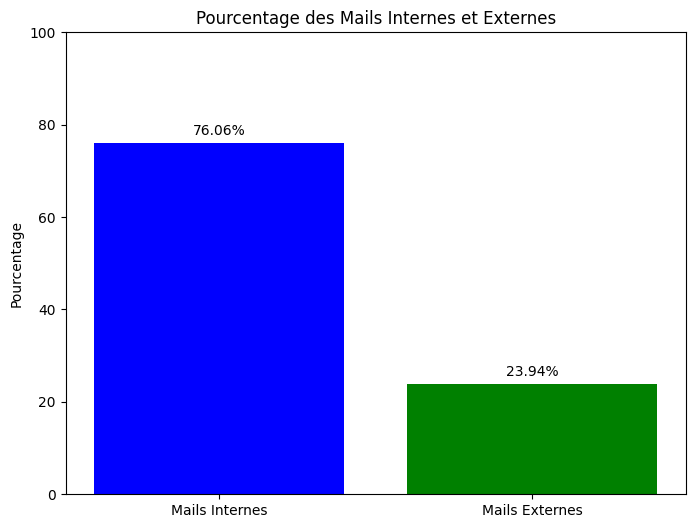

In [18]:
labels = ['Mails Internes', 'Mails Externes']
percentages = [pourcentage_internes, pourcentage_internet]

# Créer le plot
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['blue', 'green'])
plt.ylabel('Pourcentage')
plt.title('Pourcentage des Mails Internes et Externes')
plt.ylim(0, 100)

# Ajouter les pourcentages au-dessus des barres
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

# Afficher le plot
plt.show()

Nombre moyen d'emails envoyés par collaborateur

In [19]:
# Calcul du nombre moyen d'emails envoyés par personne
avg_emails_per_person = df_envoyes['Id_Collaborateur'].value_counts().mean()
print("Nombre moyen d'email envoyés par collaborateur sur la période :", avg_emails_per_person, '(',"soit",avg_emails_per_person/15,'emails/jour',")")

# Sélection des colonnes pour identifier un email unique, à l'exception de 'Nom_Interlocuteur' et 'Id_Discussion'
#cols_to_check = ['Statut_Message', 'Id_Collaborateur','Grade_Collaborateur', 'MessDate', 'MessSize', 'Subject']
# Suppression des doublons basée sur les colonnes sélectionnées
#df_envoyes_unique = df_envoyes.drop_duplicates(subset=cols_to_check)
# Calcul du nombre moyen d'emails envoyés par personne
#avg_emails_per_person = df_envoyes_unique['Id_Collaborateur'].value_counts().mean()
#print("(","Nombre moyen réel d'email envoyés par collaborateur sur la période :", avg_emails_per_person,")")


Nombre moyen d'email envoyés par collaborateur sur la période : 268.73468057366364 ( soit 17.915645371577575 emails/jour )


Calcul du nombre d'emails envoyés par grade

Grade_Collobateur
Staff                   113427
Senior                   73158
Manager                  68108
Senior Manager           49809
Partner                  41540
Director                 29792
Administrative Staff     21415
Junior Staff              6344
Assistant Manager         6202
Title:[no value]          2444
Name: count, dtype: int64

Text(0, 0.5, "Nombre d'emails")

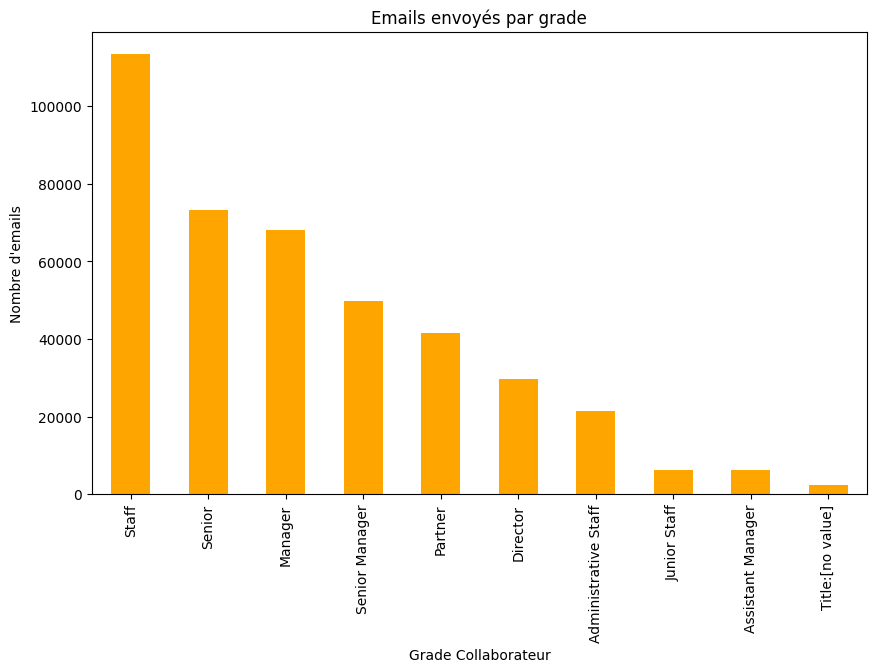

In [20]:
emails_par_grade = df_envoyes['Grade_Collobateur'].value_counts()
print(emails_par_grade)

plt.figure(figsize=(10, 6))
emails_par_grade.plot(kind='bar', color='orange')
plt.title('Emails envoyés par grade')
plt.xlabel('Grade Collaborateur')
plt.ylabel('Nombre d\'emails')


Fréquence (nombre) de mails par sujet 

In [21]:
# Compter le nombre de lignes pour chaque valeur unique de la colonne 'Subject'
compte_par_sujet = df_envoyes['Subject'].value_counts()

# Afficher les résultats
compte_par_sujet

Subject
c1f802a3772ce02a827c0e6219155c761c58de02    2115
11e623a37e87cf7995c466723ec99688d55cae8c    1905
a9c2fed51e9723965719ae87fece8da4c8ebae2d    1467
79b9f4d477aa6e3a55589c6c9fc0ebb947feed5e    1424
f9f3f9b5e913d5ddd8d234a394a4e58223d0d9d4    1111
                                            ... 
456deedf0275010d35560be529d7d2c7942f4f60       1
36b2e8963d1e5b355221a7c013a0597da0424f60       1
435d0f31604bc0e69cbac5b6509d7048683a2578       1
f58ac23206c4d758a81e038a5a079332ae8dedff       1
29cd56ae5e8ddb94a4919c05ccf6c91e4be5f523       1
Name: count, Length: 94438, dtype: int64

Nombre de sujets différents 

In [22]:
# Calculer le nombre de sujets uniques
nombre_sujets_uniques = df_envoyes['Subject'].nunique()

# Afficher le nombre de sujets uniques
print(f"Nombre de sujets différents : {nombre_sujets_uniques}")

Nombre de sujets différents : 94438


Nombre moyen de mails envoyés par sujet 

In [23]:
# Calculer le nombre total de lignes
total_lignes = len(df_envoyes)

# Calculer le nombre de sujets uniques
nombre_sujets_uniques = df['Subject'].nunique()

# Calculer le nombre moyen de lignes par sujet
moyenne_lignes_par_sujet = total_lignes / nombre_sujets_uniques

# Afficher les résultats
print(f"Nombre moyen de mails envoyés par sujet : {moyenne_lignes_par_sujet:.2f}")

Nombre moyen de mails envoyés par sujet : 2.09


Calculez le nombre moyen de destinataires par sujet d'email

In [24]:
# Compter le nombre de destinataires par sujet
dest_count_per_subject = df.groupby('Subject')['Target if Statut_Message=2, Sender otherwise'].nunique()

# Calculer la moyenne des destinataires par sujet
average_dest_per_subject = dest_count_per_subject.mean()

print(f"Le nombre moyen de destinataires par sujet d'email est : {average_dest_per_subject:.2f}")

Le nombre moyen de destinataires par sujet d'email est : 2.35


### Interactions 

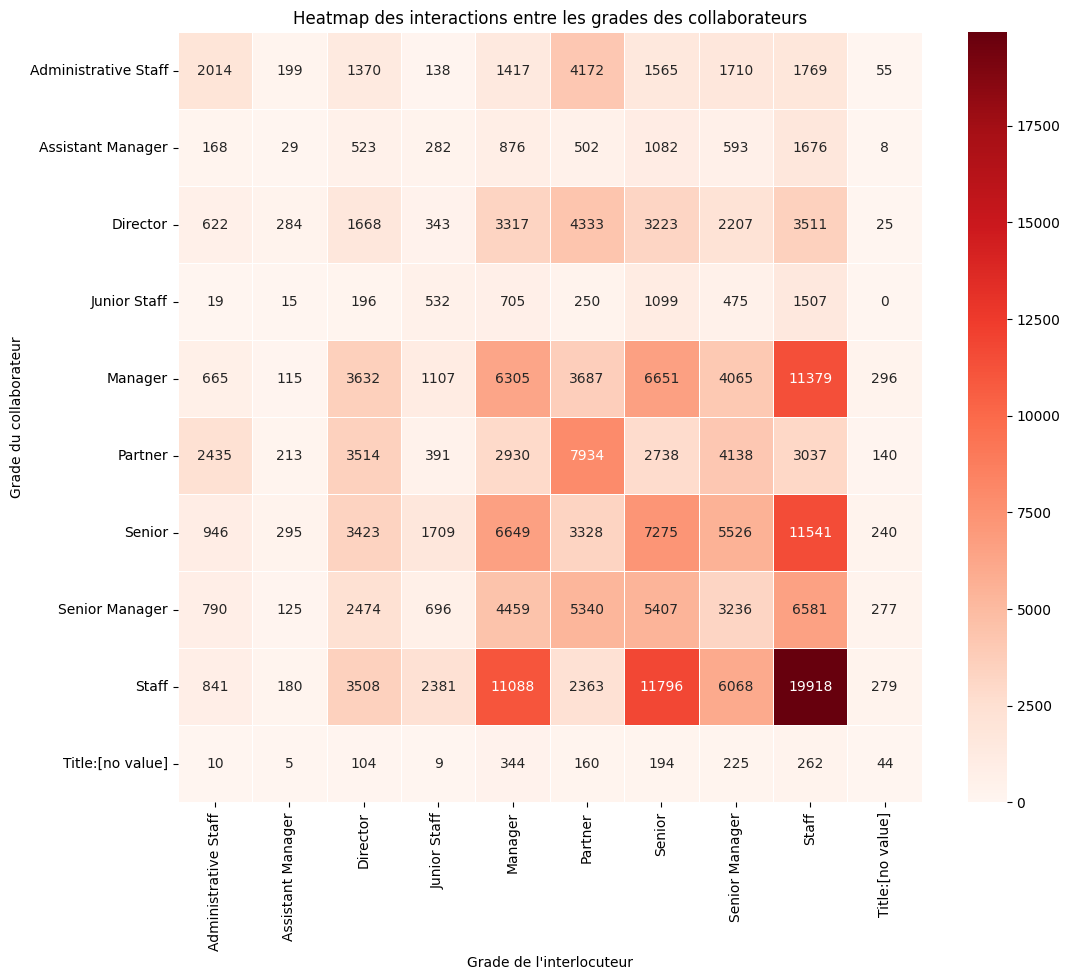

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


# Créer une table de pivotement pour compter les interactions entre les grades
pivot_table = df_envoyes.pivot_table(index='Grade_Collobateur', columns='Grade_Interlocuteur', aggfunc='size', fill_value=0)

# Créer la heatmap avec une palette de couleurs dans les rouges
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap="Reds", linewidths=.5)
plt.title("Heatmap des interactions entre les grades des collaborateurs")
plt.xlabel("Grade de l'interlocuteur")
plt.ylabel("Grade du collaborateur")
plt.show()


### Evolution du nombre d'emails envoyés dans le temps 

         Date  Nombre_emails
0  2019-03-04          35945
1  2019-03-05          32820
2  2019-03-06          33370
3  2019-03-07          31388
4  2019-03-08          28771
5  2019-03-09            849
6  2019-03-10           1793
7  2019-03-11          36908
8  2019-03-12          33827
9  2019-03-13          34046
10 2019-03-14          34345
11 2019-03-15          33889
12 2019-03-16           1187
13 2019-03-17           2064
14 2019-03-18          36004


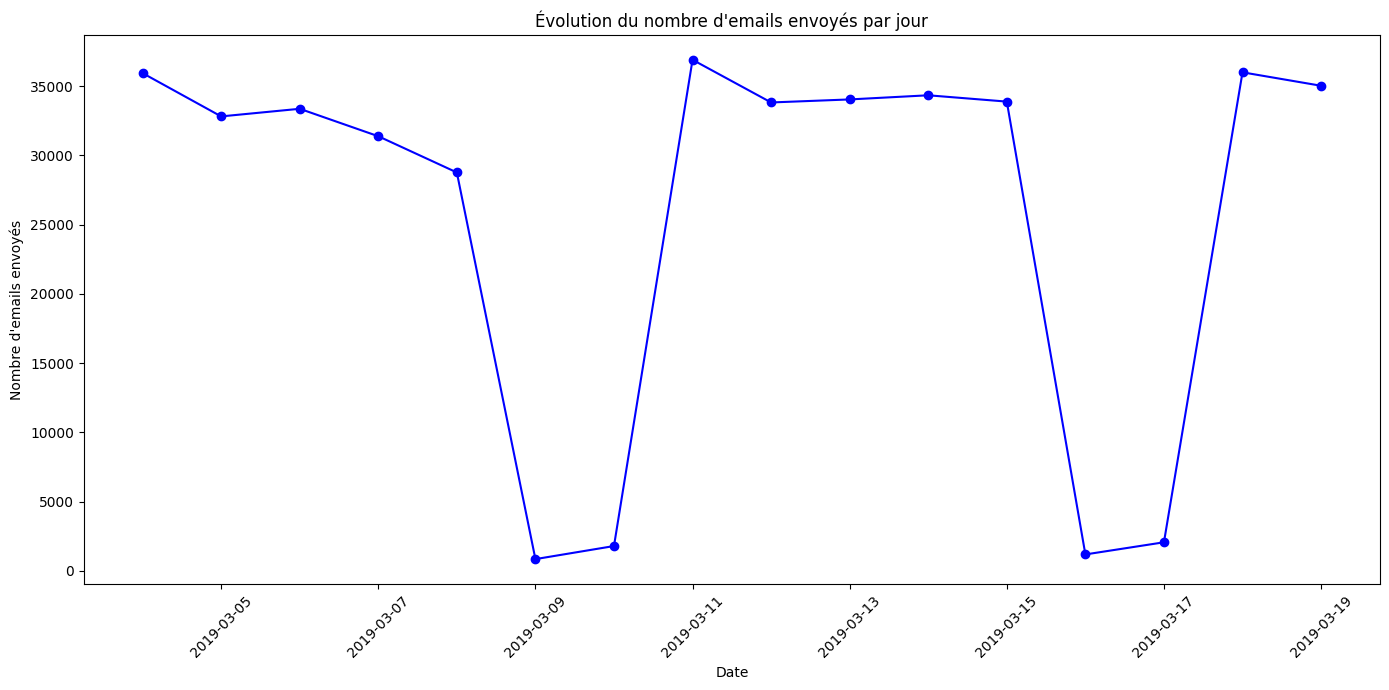

In [26]:
# Convertir la colonne 'MessDate' en type datetime
df_envoyes['MessDate'] = pd.to_datetime(df_envoyes['MessDate'], format='%d/%m/%Y %H:%M:%S')

# Extraire la date sans l'heure
df_envoyes['Date'] = df_envoyes['MessDate'].dt.date

# Compter le nombre d'emails envoyés par jour
emails_par_jour = df_envoyes.groupby('Date').size()

# Créer un DataFrame pour faciliter la manipulation
emails_par_jour_df = emails_par_jour.reset_index(name='Nombre_emails')

# Générer une plage de dates complète
date_range = pd.date_range(start=emails_par_jour_df['Date'].min(), end=emails_par_jour_df['Date'].max())

# Réindexer notre DataFrame pour inclure toutes les dates dans la plage
emails_par_jour_df = emails_par_jour_df.set_index('Date').reindex(date_range, fill_value=0).rename_axis('Date').reset_index()

# Afficher les 10 premières lignes pour vérifier
print(emails_par_jour_df.head(15))

# Créer le graphique de l'évolution du nombre d'emails envoyés par jour
plt.figure(figsize=(14, 7))
plt.plot(emails_par_jour_df['Date'], emails_par_jour_df['Nombre_emails'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Nombre d\'emails envoyés')
plt.title('Évolution du nombre d\'emails envoyés par jour')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()


   Hour  Nombre_emails
0     0           1047
1     1            600
2     2            277
3     3            291
4     4            194
5     5            449
6     6           1139
7     7           3372
8     8          11946
9     9          36706


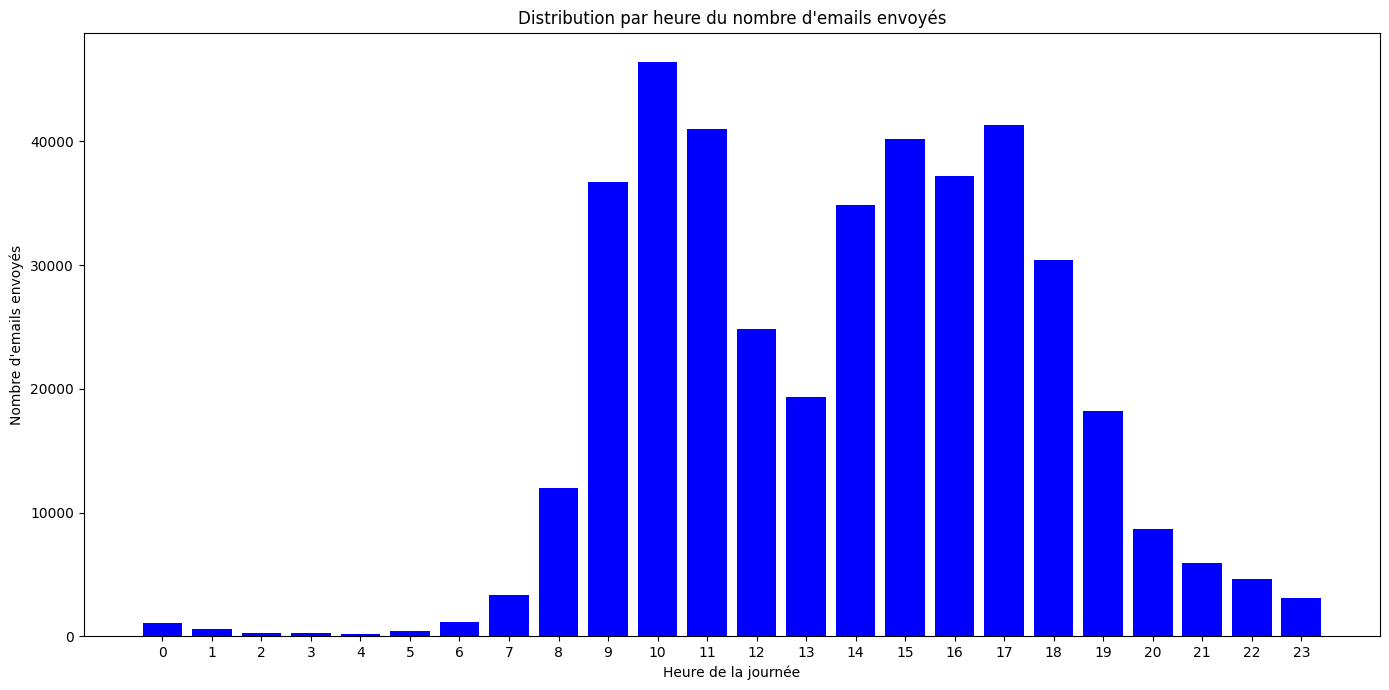

In [27]:
# Convertir la colonne 'MessDate' en type datetime
df_envoyes['MessDate'] = pd.to_datetime(df_envoyes['MessDate'], format='%d/%m/%Y %H:%M:%S')

# Extraire l'heure de chaque email
df_envoyes['Hour'] = df_envoyes['MessDate'].dt.hour

# Compter le nombre d'emails envoyés pour chaque heure
emails_par_heure = df_envoyes.groupby('Hour').size()

# Créer un DataFrame pour faciliter la manipulation
emails_par_heure_df = emails_par_heure.reset_index(name='Nombre_emails')

# Afficher les 10 premières lignes pour vérifier
print(emails_par_heure_df.head(10))

# Créer le graphique de la distribution par heure du nombre d'emails envoyés
plt.figure(figsize=(14, 7))
plt.bar(emails_par_heure_df['Hour'], emails_par_heure_df['Nombre_emails'], color='b')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre d\'emails envoyés')
plt.title('Distribution par heure du nombre d\'emails envoyés')
plt.grid(False)
plt.xticks(range(24))
plt.tight_layout()

# Afficher le graphique
plt.show()


In [28]:
df_envoyes

Statut_Message (E=1 ou R=2)  Id_Collaborateur Grade_Collobateur  \
48                                 1           1336894             Staff   
59                                 1              1625            Senior   
60                                 1               772           Manager   
67                                 1           1336894             Staff   
91                                 1           1336894             Staff   
...                              ...               ...               ...   
1174917                            1              1685    Senior Manager   
1174921                            1              1685    Senior Manager   
1174922                            1              1685    Senior Manager   
1174924                            1              1685    Senior Manager   
1174925                            1              1685    Senior Manager   

                                           Sender  Id_Interlocuteur  \
48       ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
59       93fb7339a5f491182c6acdf6ab59e04dacd8ea51            720222   
60       031c2220cade22cd67b6ec200668e1c86f570889               719   
67       ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
91       ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
...                                           ...               ...   
1174917  27a0dafd0101f368a5881378aef66a1fa5403e38           1096276   
1174921  27a0dafd0101f368a5881378aef66a1fa5403e38           1173723   
1174922  27a0dafd0101f368a5881378aef66a1fa5403e38           1096276   
1174924  27a0dafd0101f368a5881378aef66a1fa5403e38           1173723   
1174925  27a0dafd0101f368a5881378aef66a1fa5403e38           1096276   

        Grade_Interlocuteur                                    Target  \
48                    Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   
59                      NaN  f4cfc6e717c8f2ea0435512807819950ff99860f   
60                   Senior  665751c47b55cb0f3c4fc9376db0c3c7109f8d99   
67                    Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   
91                    Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   
...                     ...                                       ...   
1174917                 NaN  bd8fe6ef033d42c75abf6133e3bbe029faffc951   
1174921               Staff  ab721267b844d2c55730b7c6c1a738dfa7890046   
1174922                 NaN  bd8fe6ef033d42c75abf6133e3bbe029faffc951   
1174924               Staff  ab721267b844d2c55730b7c6c1a738dfa7890046   
1174925                 NaN  bd8fe6ef033d42c75abf6133e3bbe029faffc951   

        Statut_Interlocuteur                              Domaine_Name  \
48                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
59                  Internet  0553467002588255e596de9eed5b9c834c12975f   
60                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
67                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
91                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
...                      ...                                       ...   
1174917             Internet  761ecb06a8977d424023dc4b444707794040552c   
1174921             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174922             Internet  761ecb06a8977d424023dc4b444707794040552c   
1174924             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174925             Internet  761ecb06a8977d424023dc4b444707794040552c   

                   MessDate            MessSize  \
48      2019-03-04 00:01:03  0,0511951446533203   
59      2019-03-04 00:02:44  0,0274133682250977   
60      2019-03-04 00:03:14  0,0353221893310547   
67      2019-03-04 00:04:13  0,0530796051025391   
91      2019-03-04 00:09:48   0,110533714294434   
...                     ...                 ...   
1174917 2019-03-19 23:58:53    10,4949312210083   
1174921 2019-03-19 23:59:20    10,0429849624634   
1174922 2019-03-19

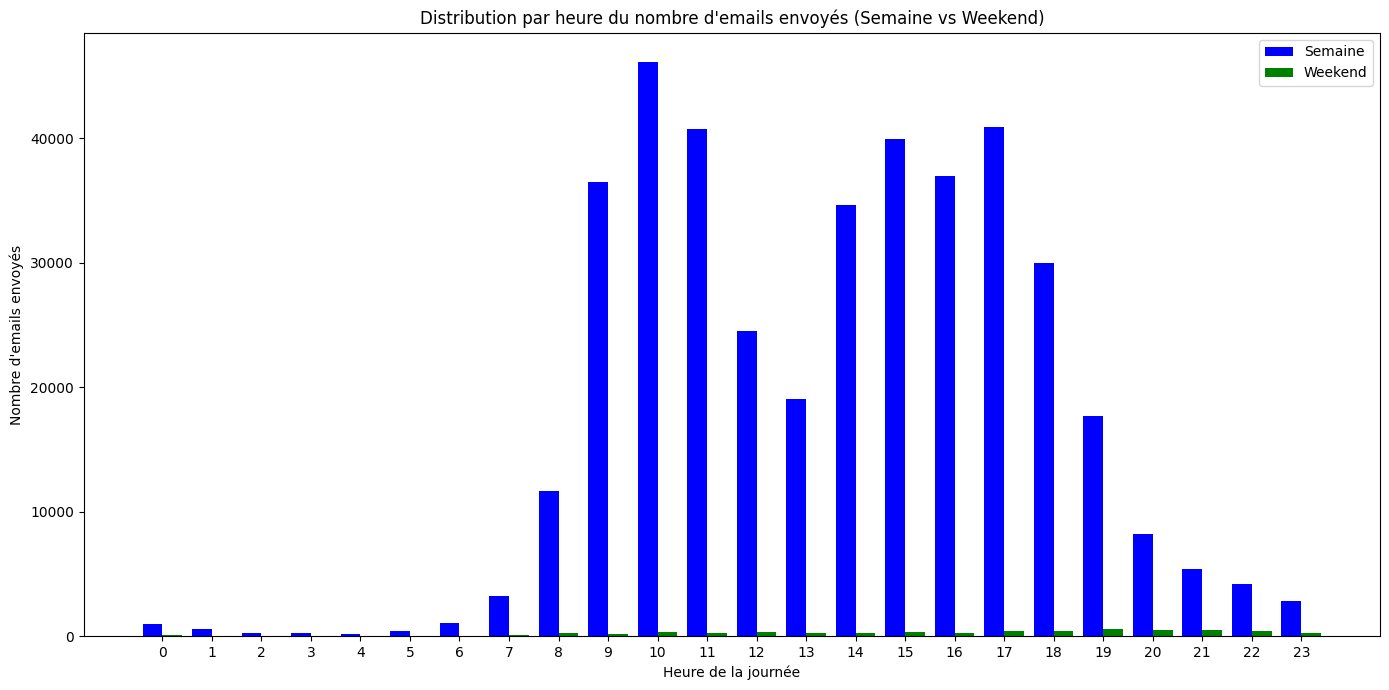

In [29]:
# Ajouter une colonne pour le jour de la semaine
df_envoyes['Weekday'] = df_envoyes['MessDate'].dt.weekday

# Séparer les emails de la semaine (0-4) et du weekend (5-6)
emails_semaine = df_envoyes[df_envoyes['Weekday'] < 5]
emails_weekend = df_envoyes[df_envoyes['Weekday'] >= 5]

# Si 'MessDate' n'est pas en datetime, le convertir
df_envoyes['MessDate'] = pd.to_datetime(df_envoyes['MessDate'], format='%Y-%m-%d %H:%M:%S')

# Séparer les emails de la semaine (0-4) et du weekend (5-6)
emails_semaine = df_envoyes[df_envoyes['Weekday'] < 5]
emails_weekend = df_envoyes[df_envoyes['Weekday'] >= 5]

# Compter le nombre d'emails envoyés pour chaque heure pour la semaine
emails_par_heure_semaine = emails_semaine.groupby('Hour').size()
emails_par_heure_semaine_df = emails_par_heure_semaine.reset_index(name='Nombre_emails_semaine')

# Compter le nombre d'emails envoyés pour chaque heure pour le weekend
emails_par_heure_weekend = emails_weekend.groupby('Hour').size()
emails_par_heure_weekend_df = emails_par_heure_weekend.reset_index(name='Nombre_emails_weekend')

# Créer le graphique de la distribution par heure du nombre d'emails envoyés pour la semaine
plt.figure(figsize=(14, 7))
plt.bar(emails_par_heure_semaine_df['Hour'] - 0.2, emails_par_heure_semaine_df['Nombre_emails_semaine'], width=0.4, label='Semaine', color='b')

# Créer le graphique de la distribution par heure du nombre d'emails envoyés pour le weekend
plt.bar(emails_par_heure_weekend_df['Hour'] + 0.2, emails_par_heure_weekend_df['Nombre_emails_weekend'], width=0.4, label='Weekend', color='g')

# Ajouter les labels et le titre
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre d\'emails envoyés')
plt.title('Distribution par heure du nombre d\'emails envoyés (Semaine vs Weekend)')
plt.legend()
plt.grid(False)
plt.xticks(range(24))
plt.tight_layout()

# Afficher le graphique
plt.show()

In [30]:
emails_par_heure_weekend

Hour
0      69
1      45
2      10
3      21
4       6
5      56
6      57
7     119
8     244
9     215
10    302
11    271
12    303
13    233
14    228
15    301
16    278
17    426
18    451
19    542
20    505
21    494
22    433
23    284
dtype: int64

In [31]:
emails_par_heure_semaine

Hour
0       978
1       555
2       267
3       270
4       188
5       393
6      1082
7      3253
8     11702
9     36491
10    46155
11    40755
12    24506
13    19077
14    34646
15    39898
16    36967
17    40923
18    29957
19    17683
20     8200
21     5438
22     4173
23     2789
dtype: int64

### Analyse de la taille des messages

#### Catégorisation des mails par MessSize

In [32]:
# Obtenir la valeur maximale de MessSize
max_size = df_envoyes['MessSize'].max()

# Obtenir la valeur minimale de MessSize
min_size = df_envoyes['MessSize'].min()

print("La taille maximale du message est :", max_size, "MB")
print("La taille minimale du message est :", min_size, "MB")

La taille maximale du message est : 98,9899797439575 MB
La taille minimale du message est : 0 MB


In [33]:
# Remplacer les virgules par des points et convertir en float
df_envoyes['MessSize'] = df_envoyes['MessSize'].str.replace(',', '.').astype(float)

# Vérifier les modifications
print(df_envoyes['MessSize'].dtypes)

float64


Nous allons regrouper les mails envoyés sous la forme suivante : 

- Très légers / Légers : pour les messages de 0 à 1 MB
- Moyens : pour les messages de 1 à 10 MB
- Lourds / Très lourds : pour les messages de 10 à 100 MB

In [34]:
# Création des bins pour les trois catégories de taille de message
bins = [0, 1, 10, 100]  # Trois intervalles pour regrouper les données

# Labels pour chaque catégorie
labels = ['Très légers / Légers', 'Moyens', 'Lourds / Très lourds']

# Ajout de la nouvelle colonne au DataFrame
df_envoyes['Categorie_MessSize'] = pd.cut(df_envoyes['MessSize'], bins=bins, labels=labels, right=False)

In [35]:
# Compter les occurrences dans chaque catégorie
compte_categories = df_envoyes['Categorie_MessSize'].value_counts()

# Afficher les résultats
print(compte_categories)

Categorie_MessSize
Très légers / Légers    369549
Moyens                   36558
Lourds / Très lourds      6132
Name: count, dtype: int64


Clustering sur les mails envoyés en se basant sur MessSize

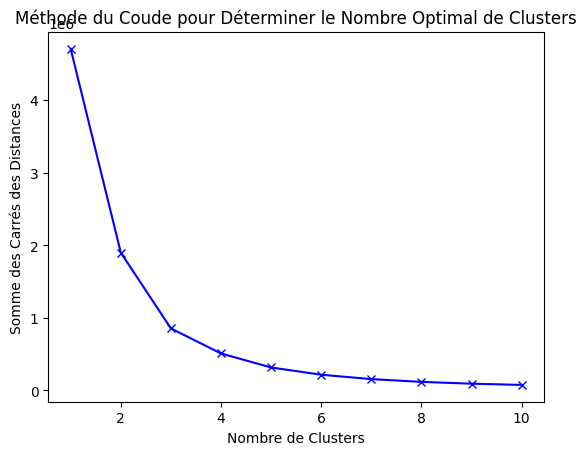

In [36]:
from sklearn.cluster import KMeans 

# Utilisez uniquement la colonne MessSize pour le clustering
X = df_envoyes[['MessSize']]

# Calculez la somme des carrés des distances pour différentes valeurs de k
sum_of_squared_distances = []
K = range(1, 11)  # Essayez avec différentes valeurs de k
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

# Tracez la courbe du coude
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Somme des Carrés des Distances')
plt.title('Méthode du Coude pour Déterminer le Nombre Optimal de Clusters')
plt.show()

Cluster 0: 404309 mails
Cluster 1: 7229 mails
Cluster 2: 701 mails


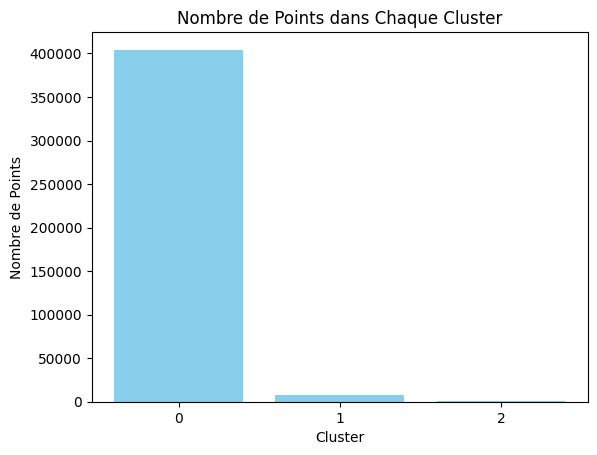

In [37]:
# Choisissez le nombre de clusters (k)
k = 3

# Créer le modèle K-means
kmeans = KMeans(n_clusters=k, random_state=42)

# Adapter le modèle aux données
kmeans.fit(X)

# Prédire les clusters pour chaque échantillon
clusters = kmeans.predict(X)

# Compter le nombre de points dans chaque cluster
counts = np.bincount(clusters)

# Afficher le nombre de mails dans chaque cluster
for i, count in enumerate(counts):
    print(f"Cluster {i}: {count} mails")

# Créer un plot pour afficher le nombre de points dans chaque cluster
plt.bar(range(k), counts, align='center', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Nombre de Points')
plt.title('Nombre de Points dans Chaque Cluster')
plt.xticks(range(k))
plt.show()

Centres de Cluster:
Cluster 0: [0.34947275]
Cluster 1: [15.02912547]
Cluster 2: [58.19066232]


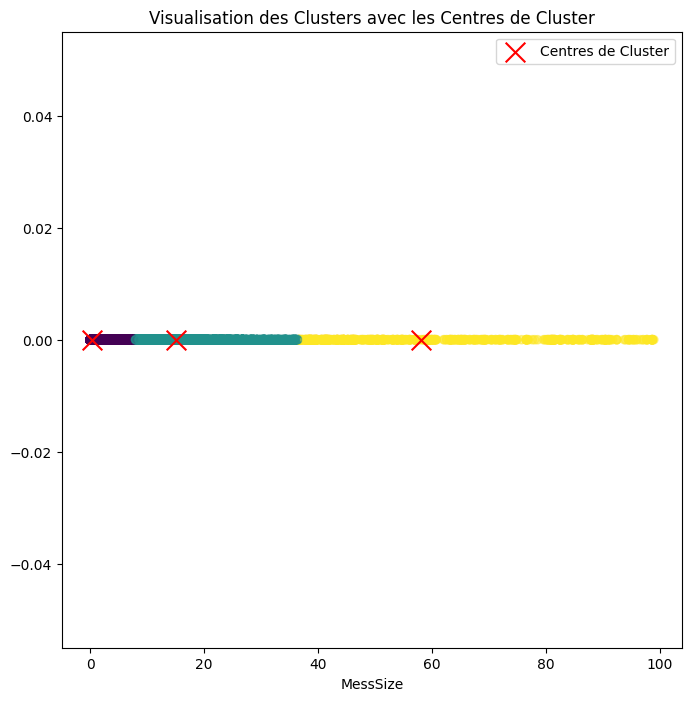

In [38]:
# Obtenez les centres de cluster
centers = kmeans.cluster_centers_

# Affichez les centres de cluster
print("Centres de Cluster:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

# Visualisez les centres de cluster
plt.figure(figsize=(8, 8))
plt.scatter(X['MessSize'], np.zeros_like(X['MessSize']), c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(centers[:, 0], np.zeros_like(centers[:, 0]), marker='x', color='red', s=200, label='Centres de Cluster')
plt.xlabel('MessSize')
plt.title('Visualisation des Clusters avec les Centres de Cluster')
plt.legend()
plt.show()

### Roles

In [39]:
df_envoyes['Grade_Collobateur'].unique()

array(['Staff', 'Senior', 'Manager', 'Junior Staff', 'Senior Manager',
       'Director', 'Partner', 'Administrative Staff', 'Title:[no value]',
       'Assistant Manager'], dtype=object)

In [40]:
df_envoyes['Statut_Interlocuteur'].unique()


array(['Internal', 'Internet'], dtype=object)

In [41]:
# Number of people per role (email senders)
df_envoyes[['Id_Collaborateur','Grade_Collobateur']].drop_duplicates().groupby('Grade_Collobateur').size().sort_values()

Grade_Collobateur
Assistant Manager         4
Title:[no value]         19
Administrative Staff     29
Director                 64
Partner                  64
Junior Staff            102
Senior Manager          113
Manager                 195
Senior                  307
Staff                   638
dtype: int64

### Nombre de mails envoyés par chaque personne 

In [42]:
# Compter le nombre de mails envoyés par chaque personne (sender)
mails_par_personne = df_envoyes['Id_Collaborateur'].value_counts()

# Afficher les résultats
print(mails_par_personne)

Id_Collaborateur
1683       4792
1543       2516
1629       2337
1075       2247
1331       2189
           ... 
1007          2
1195          1
1672532       1
969           1
1828669       1
Name: count, Length: 1534, dtype: int64


### Nombre moyen de mails par personne

In [43]:
# Calculer le nombre total de mails
nombre_total_mails = len(df_envoyes)

# Calculer le nombre total de personnes (senders) uniques
nombre_total_personnes = len(df_envoyes['Id_Collaborateur'].unique())

# Calculer le nombre moyen de mails par personne
nombre_moyen_mails_par_personne = nombre_total_mails / nombre_total_personnes

# Afficher le résultat
print("Le nombre moyen de mails par personne est :", nombre_moyen_mails_par_personne)

Le nombre moyen de mails par personne est : 268.73468057366364


### Combien de gens s'envoient des mails à eux mêmes ? 

In [44]:
df_meme_valeur = df_envoyes[df_envoyes['Id_Collaborateur'] == df_envoyes['Id_Interlocuteur']]

# Afficher les lignes correspondantes
df_meme_valeur

Statut_Message (E=1 ou R=2)  Id_Collaborateur     Grade_Collobateur  \
48                                 1           1336894                 Staff   
67                                 1           1336894                 Staff   
91                                 1           1336894                 Staff   
357                                1              1744        Senior Manager   
437                                1           1151581                 Staff   
...                              ...               ...                   ...   
1173864                            1              1490        Senior Manager   
1174457                            1              1875               Manager   
1174689                            1            963897                Senior   
1174855                            1              1274                Senior   
1174891                            1              1192  Administrative Staff   

                                           Sender  Id_Interlocuteur  \
48       ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
67       ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
91       ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
357      e272f06766abc7fb0ad916865cfcee21f5877e77              1744   
437      956155aefad9795acd16527ec7c14675186fa34e           1151581   
...                                           ...               ...   
1173864  3b715e588994872380cf6f7bf4454a0e8eb3b5c0              1490   
1174457  fd5385640aaf3466aa594d9c9953dba6e163cf55              1875   
1174689  08258ccf7da568892e1d86bdbf817e47a5edd517            963897   
1174855  73bd76f8c3a37e004415575d0aa4c50034d2de0e              1274   
1174891  a18862457958b9bfc705c1315afc4e143af7fb49              1192   

          Grade_Interlocuteur                                    Target  \
48                      Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   
67                      Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   
91                      Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   
357            Senior Manager  e272f06766abc7fb0ad916865cfcee21f5877e77   
437                     Staff  956155aefad9795acd16527ec7c14675186fa34e   
...                       ...                                       ...   
1173864        Senior Manager  3b715e588994872380cf6f7bf4454a0e8eb3b5c0   
1174457               Manager  fd5385640aaf3466aa594d9c9953dba6e163cf55   
1174689                Senior  08258ccf7da568892e1d86bdbf817e47a5edd517   
1174855                Senior  73bd76f8c3a37e004415575d0aa4c50034d2de0e   
1174891  Administrative Staff  a18862457958b9bfc705c1315afc4e143af7fb49   

        Statut_Interlocuteur                              Domaine_Name  \
48                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
67                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
91                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
357                 Internal  6d2830b1e76dc7300fce6745176601827d233de8   
437                 Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
...                      ...                                       ...   
1173864             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174457             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174689             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174855             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174891             Internal  6d2830b1e76dc7300fce6745176601827d233de8   

                   MessDate  MessSize  \
48      2019-03-04 00:01:03  0.051195   
67      2019-03-04 00:04:13  0.053080   
91      2019-03-04 00:09:48  0.110534   
357     2019-03-04 01:13:52  0.005172   
437     2019-03-04 01:40:39  2.603863   
...                     ...       ...   
1173864 2019-03-19 22:47:43  0.604519   
1174457 2019-03-19 23:27:02  0.005075   
1174689 2019-03-19 23:43:34  0.16028

In [45]:
# Compter le nombre de lignes où Sender est égal à Target
nombre_meme_valeur = df_meme_valeur.shape[0]

# Compter le nombre total de lignes dans le DataFrame
nombre_total_lignes = df_envoyes.shape[0]

# Calculer le pourcentage
pourcentage = (nombre_meme_valeur / nombre_total_lignes) * 100

# Afficher le pourcentage
print(f"Pourcentage des lignes où Sender est égal à Target: {pourcentage:.2f}%")

Pourcentage des lignes où Sender est égal à Target: 1.08%


L'envoi des mails à soi même peut avoir plusieurs interprétations : 
- Prise de notes rapide (pour se rappeler quelque chose comme un tâche ou une information importante).
- Transfert de fichiers entre différents appareils : envoyer un mail du bureau pour y accéder par téléphone.
- Rappels et notifications : s'envoyer un mail permet à l'utilisateur de s'assurer qu'il verra le rappel dans sa boîte de réception.
- Se mettre en copie : ce qui permet d'avoir un accès facile à la conversation sans devoir regarder les dossiers mails envoyés, garder une preuve d'envoi pour les mails importants, pouvoir répondre facilement au mail sans fouiller dans les mails envoyés. 

Un mail est défini par un couple unique (MessSize, MessDate).

On va grouper les mails dans des sous groupe ayant le même MessDate et MessSize, et quand le Id_Collaborateur = Id_Interlocuteur, on ajoute cette ligne à une table df_mails_soi_meme et on quantifie le nombre de mails envoyés à soi même seulement.

Après on va supprimer ces lignes de la base.


# Data Preparation

In [46]:
df_envoyes

Statut_Message (E=1 ou R=2)  Id_Collaborateur Grade_Collobateur  \
48                                 1           1336894             Staff   
59                                 1              1625            Senior   
60                                 1               772           Manager   
67                                 1           1336894             Staff   
91                                 1           1336894             Staff   
...                              ...               ...               ...   
1174917                            1              1685    Senior Manager   
1174921                            1              1685    Senior Manager   
1174922                            1              1685    Senior Manager   
1174924                            1              1685    Senior Manager   
1174925                            1              1685    Senior Manager   

                                           Sender  Id_Interlocuteur  \
48       ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
59       93fb7339a5f491182c6acdf6ab59e04dacd8ea51            720222   
60       031c2220cade22cd67b6ec200668e1c86f570889               719   
67       ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
91       ae480cf987c8c8b1c3430d66359f67d838ce462f           1336894   
...                                           ...               ...   
1174917  27a0dafd0101f368a5881378aef66a1fa5403e38           1096276   
1174921  27a0dafd0101f368a5881378aef66a1fa5403e38           1173723   
1174922  27a0dafd0101f368a5881378aef66a1fa5403e38           1096276   
1174924  27a0dafd0101f368a5881378aef66a1fa5403e38           1173723   
1174925  27a0dafd0101f368a5881378aef66a1fa5403e38           1096276   

        Grade_Interlocuteur                                    Target  \
48                    Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   
59                      NaN  f4cfc6e717c8f2ea0435512807819950ff99860f   
60                   Senior  665751c47b55cb0f3c4fc9376db0c3c7109f8d99   
67                    Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   
91                    Staff  ae480cf987c8c8b1c3430d66359f67d838ce462f   
...                     ...                                       ...   
1174917                 NaN  bd8fe6ef033d42c75abf6133e3bbe029faffc951   
1174921               Staff  ab721267b844d2c55730b7c6c1a738dfa7890046   
1174922                 NaN  bd8fe6ef033d42c75abf6133e3bbe029faffc951   
1174924               Staff  ab721267b844d2c55730b7c6c1a738dfa7890046   
1174925                 NaN  bd8fe6ef033d42c75abf6133e3bbe029faffc951   

        Statut_Interlocuteur                              Domaine_Name  \
48                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
59                  Internet  0553467002588255e596de9eed5b9c834c12975f   
60                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
67                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
91                  Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
...                      ...                                       ...   
1174917             Internet  761ecb06a8977d424023dc4b444707794040552c   
1174921             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174922             Internet  761ecb06a8977d424023dc4b444707794040552c   
1174924             Internal  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7   
1174925             Internet  761ecb06a8977d424023dc4b444707794040552c   

                   MessDate   MessSize  \
48      2019-03-04 00:01:03   0.051195   
59      2019-03-04 00:02:44   0.027413   
60      2019-03-04 00:03:14   0.035322   
67      2019-03-04 00:04:13   0.053080   
91      2019-03-04 00:09:48   0.110534   
...                     ...        ...   
1174917 2019-03-19 23:58:53  10.494931   
1174921 2019-03-19 23:59:20  10.042985   
1174922 2019-03-19 23:59:20  10.042985   
1174924 2019-03-19 23:59:33   5.762956   
1174925 2019-03

In [47]:
# Encore un peu de data preparation

df_envoyes = df_envoyes[df_envoyes['Statut_Interlocuteur'] != 'Internet']
df_envoyes = df_envoyes[df_envoyes['Id_Collaborateur'] != df_envoyes['Id_Interlocuteur']]
df_envoyes = df_envoyes.drop('Sender', axis=1)
df_envoyes = df_envoyes.drop('Target', axis=1)
df_envoyes = df_envoyes.drop('Date', axis=1)
df_envoyes = df_envoyes.drop('Hour', axis=1)
df_envoyes = df_envoyes.drop('Weekday', axis=1)

df_envoyes

Statut_Message (E=1 ou R=2)  Id_Collaborateur Grade_Collobateur  \
60                                 1               772           Manager   
93                                 1              1199            Senior   
125                                1           1378156      Junior Staff   
360                                1              1316          Director   
364                                1             13468           Partner   
...                              ...               ...               ...   
1174899                            1              1685    Senior Manager   
1174907                            1              1685    Senior Manager   
1174916                            1              1685    Senior Manager   
1174921                            1              1685    Senior Manager   
1174924                            1              1685    Senior Manager   

         Id_Interlocuteur Grade_Interlocuteur Statut_Interlocuteur  \
60                    719              Senior             Internal   
93                   6894                 NaN             Internal   
125                  1052             Manager             Internal   
360                  1757             Partner             Internal   
364                  5907                 NaN             Internal   
...                   ...                 ...                  ...   
1174899           1173723               Staff             Internal   
1174907           1173723               Staff             Internal   
1174916           1173723               Staff             Internal   
1174921           1173723               Staff             Internal   
1174924           1173723               Staff             Internal   

                                     Domaine_Name            MessDate  \
60       f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7 2019-03-04 00:03:14   
93       6d2830b1e76dc7300fce6745176601827d233de8 2019-03-04 00:10:30   
125      f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7 2019-03-04 00:25:37   
360      f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7 2019-03-04 01:14:13   
364      f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7 2019-03-04 01:16:50   
...                                           ...                 ...   
1174899  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7 2019-03-19 23:57:33   
1174907  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7 2019-03-19 23:58:28   
1174916  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7 2019-03-19 23:58:53   
1174921  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7 2019-03-19 23:59:20   
1174924  f0ea57ffa0ffbe9ee2ee743dd0b3a739abe3c8d7 2019-03-19 23:59:33   

          MessSize                                   Subject  \
60        0.035322  4bb26edab1c7a7bd212a86e4308d128af11e117c   
93        0.088294  b8740c32ae8a46b1b66bcd7fa3ae3cb1f637ff37   
125       0.009600  1a33e8551a549e3fa7b20cfa23bc29b604257880   
360       0.116391  399630c9044c2982f494092244bd513a8a44750b   
364       0.152438  a719d360d0de0e27c91d9eade5b13c09db90da8c   
...            ...                                       ...   
1174899  57.315927  9d231eecb9005c995281e7073656c524968da9e9   
1174907  11.318745  8854aa36e886ac05a2e3232b2bbbc5153061feb4   
1174916  10.494931  d50150fe40834b36b3b00143a44bef8739eb83d1   
1174921  10.042985  a87260372529cbefc1f1fcb98fa344b623d8872f   
1174924   5.762956  e07e8cec7f1fa3a230c8602bbad0bb04a4014514   

           Categorie_MessSize  
60       Très légers / Légers  
93       Très légers / Légers  
125      Très légers / Légers  
360      Très légers / Légers  
364      Très légers / Légers  
...                       ...  
1174899  Lourds / Très lourds  
1174907  Lourds / Très lourds  
1174916  Lourds / Très lourds  
1174921  Lourds / Très lourds  
1174924                Moyens  

[309088 rows x 11 columns]

In [48]:
df_envoyes.shape

(309088, 11)

# Modeling

### Création du graphe

In [49]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Créer le graphe orienté
G = nx.DiGraph()

# Ajouter les nœuds avec attributs
for index, row in df_envoyes.iterrows():
    if not G.has_node(row['Id_Collaborateur']):
        G.add_node(row['Id_Collaborateur'], grade=row['Grade_Collobateur'])
    if not G.has_node(row['Id_Interlocuteur']):
        G.add_node(row['Id_Interlocuteur'], grade=row['Grade_Interlocuteur'])
    
    if G.has_edge(row['Id_Collaborateur'], row['Id_Interlocuteur']):
        G[row['Id_Collaborateur']][row['Id_Interlocuteur']]['weight'] += 1
    else:
        G.add_edge(row['Id_Collaborateur'], row['Id_Interlocuteur'], weight=1)


In [50]:
num_nodes = G.number_of_nodes()
print(f"Nombre de nœuds: {num_nodes}")

num_edges = G.number_of_edges()
print(f"Nombre d'arêtes: {num_edges}")

Nombre de nœuds: 7824
Nombre d'arêtes: 70713


In [51]:
first_node = list(G.nodes(data=True))[0]
print(f"Attributs du premier nœud: {first_node}")

Attributs du premier nœud: (772, {'grade': 'Manager'})


In [52]:
all_nodes_attributes = dict(G.nodes(data=True))
print(f"Attributs de tous les nœuds: {all_nodes_attributes}")

Attributs de tous les nœuds: {772: {'grade': 'Manager'}, 719: {'grade': 'Senior'}, 1199: {'grade': 'Senior'}, 6894: {'grade': nan}, 1378156: {'grade': 'Junior Staff'}, 1052: {'grade': 'Manager'}, 1316: {'grade': 'Director'}, 1757: {'grade': 'Partner'}, 13468: {'grade': 'Partner'}, 5907: {'grade': nan}, 1405828: {'grade': 'Partner'}, 957768: {'grade': nan}, 94304: {'grade': nan}, 975538: {'grade': 'Staff'}, 1609: {'grade': 'Manager'}, 1279: {'grade': 'Director'}, 1056: {'grade': 'Partner'}, 1077: {'grade': 'Manager'}, 1610: {'grade': 'Administrative Staff'}, 1014427: {'grade': 'Staff'}, 853: {'grade': 'Senior'}, 1416: {'grade': 'Partner'}, 1227: {'grade': 'Senior'}, 13486: {'grade': 'Senior Manager'}, 1428: {'grade': 'Partner'}, 1905: {'grade': 'Partner'}, 1178: {'grade': 'Administrative Staff'}, 1134: {'grade': 'Senior Manager'}, 13407: {'grade': 'Staff'}, 997463: {'grade': 'Staff'}, 861: {'grade': 'Senior'}, 752: {'grade': 'Senior'}, 963878: {'grade': 'Senior'}, 1639: {'grade': 'Direc

In [53]:
first_edge = list(G.edges(data=True))[0]
print(f"Attributs de la première arête: {first_edge}")

Attributs de la première arête: (772, 719, {'weight': 49})


# Etude du graphe et métriques 

## Etude de la centralité des noeuds

### Analyse centralité par degré

In [54]:
degree_centrality = nx.degree_centrality(G)

# Trier les nœuds par degré décroissant et sélectionner les 10 premiers
top_nodes_with_attributes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Afficher les nœuds avec leurs attributs
for node, degree in top_nodes_with_attributes:
    node_attributes = G.nodes[node]
    print(f"Nœud : {node}, Degré : {degree}, Attributs : {node_attributes}")

Nœud : 1620429, Degré : 0.19583280071583792, Attributs : {'grade': 'Partner'}
Nœud : 1629, Degré : 0.17998210405215392, Attributs : {'grade': 'Director'}
Nœud : 1683, Degré : 0.15237121308960758, Attributs : {'grade': 'Assistant Manager'}
Nœud : 7221, Degré : 0.13434743704461205, Attributs : {'grade': nan}
Nœud : 1331, Degré : 0.11977502236993481, Attributs : {'grade': 'Partner'}
Nœud : 13215, Degré : 0.11006007925348332, Attributs : {'grade': 'Staff'}
Nœud : 1348, Degré : 0.08321615748434105, Attributs : {'grade': 'Director'}
Nœud : 13269, Degré : 0.066981976223955, Attributs : {'grade': 'Title:[no value]'}
Nœud : 1428, Degré : 0.0664706634283523, Attributs : {'grade': 'Partner'}
Nœud : 13235, Degré : 0.06340278665473605, Attributs : {'grade': 'Staff'}


In [55]:
#Suivi des statistiques:
# Calcul du nombre moyen d'emails envoyés par personne par jour
avg_emails_per_person = df_envoyes['Id_Collaborateur'].value_counts().mean()
print("Nombre moyen d'email envoyés par collaborateur sur la période :", avg_emails_per_person, '(',"soit",avg_emails_per_person/15,'emails/jour',")")

Nombre moyen d'email envoyés par collaborateur sur la période : 201.62296151337247 ( soit 13.441530767558165 emails/jour )


In [56]:
avg_emails_per_person

201.62296151337247

In [57]:
#Suivi des statistiques:
# Calcul du nombre moyen d'emails envoyés par personne par jour
emails_per_person = df_envoyes['Id_Collaborateur'].value_counts()

# Création d'un DataFrame à partir du résultat pour sauvegarder en CSV
emails_per_person_df = emails_per_person.reset_index()
emails_per_person_df.columns = ['Id_Collaborateur', 'Emails_Sent']

# Sauvegarde du résultat dans un fichier CSV
emails_per_person_df.to_csv('emails_per_person.csv', index=False)

In [58]:
in_degrees = G.in_degree()
out_degrees = G.out_degree()
#print(in_degrees)
#print(out_degrees)

In [59]:
# Fonction pour obtenir les top n nœuds par degré
def get_top_nodes_by_degree(degree_view, n=10):
    sorted_degrees = sorted(degree_view, key=lambda x: x[1], reverse=True)[:n]
    return sorted_degrees

# Obtenir les top 10 nœuds par degrés entrants et sortants
top_10_in_degrees = get_top_nodes_by_degree(in_degrees)
top_10_out_degrees = get_top_nodes_by_degree(out_degrees)

# Fonction pour afficher les nœuds et leurs attributs
def display_nodes_with_attributes(graph, top_nodes):
    for node, degree in top_nodes:
        print(f"Node: {node}, Degree: {degree}")
        for attr, value in graph.nodes[node].items():
            print(f"  {attr}: {value}")
        print()

# Afficher les résultats avec les attributs des nœuds
print("Top 10 Nœuds par Degrés Entrants:")
display_nodes_with_attributes(G, top_10_in_degrees)

print("\nTop 10 Nœuds par Degrés Sortants:")
display_nodes_with_attributes(G, top_10_out_degrees)

Top 10 Nœuds par Degrés Entrants:
Node: 7221, Degree: 1051
  grade: nan

Node: 1056, Degree: 197
  grade: Partner

Node: 1629, Degree: 169
  grade: Director

Node: 6698, Degree: 145
  grade: nan

Node: 1428, Degree: 143
  grade: Partner

Node: 1405828, Degree: 136
  grade: Partner

Node: 1436, Degree: 127
  grade: Partner

Node: 1558135, Degree: 118
  grade: Senior

Node: 13338, Degree: 114
  grade: Staff

Node: 1072, Degree: 111
  grade: Partner


Top 10 Nœuds par Degrés Sortants:
Node: 1620429, Degree: 1468
  grade: Partner

Node: 1629, Degree: 1239
  grade: Director

Node: 1683, Degree: 1120
  grade: Assistant Manager

Node: 1331, Degree: 861
  grade: Partner

Node: 13215, Degree: 852
  grade: Staff

Node: 1348, Degree: 590
  grade: Director

Node: 13269, Degree: 517
  grade: Title:[no value]

Node: 13235, Degree: 481
  grade: Staff

Node: 866, Degree: 452
  grade: Staff

Node: 1441, Degree: 383
  grade: Administrative Staff



In [60]:
# Calcul du degré sortant moyen
out_degrees = list(dict(G.out_degree()).values())
average_out_degree = sum(out_degrees) / len(out_degrees)
median_out_degree = np.median(out_degrees)

print("Le degré sortant moyen est:", average_out_degree)
print("La médiane des degrés sortants est:", median_out_degree)

Le degré sortant moyen est: 9.037960122699387
La médiane des degrés sortants est: 0.0


Le degré sortant moyen est: 9.037960122699387
La médiane des degrés sortants est: 0.0


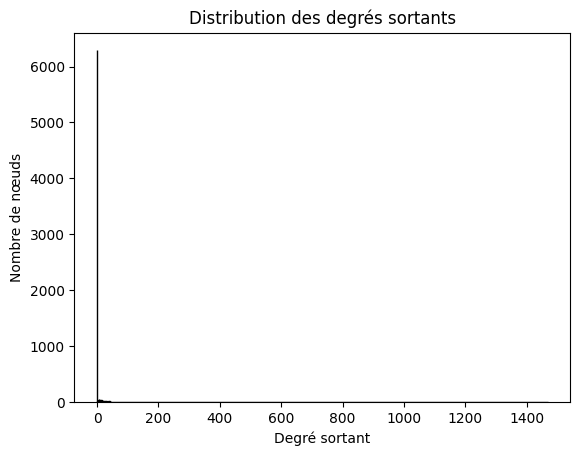

In [61]:
# Calcul du degré sortant moyen
out_degrees = list(dict(G.out_degree()).values())
average_out_degree = sum(out_degrees) / len(out_degrees)
median_out_degree = np.median(out_degrees)

print("Le degré sortant moyen est:", average_out_degree)
print("La médiane des degrés sortants est:", median_out_degree)

# Affichage de la distribution des degrés sortants
plt.hist(out_degrees, bins=range(max(out_degrees)+2), align='left', edgecolor='black')
plt.xlabel('Degré sortant')
plt.ylabel('Nombre de nœuds')
plt.title('Distribution des degrés sortants')
plt.show()

Le degré sortant moyen est: 9.037960122699387
La médiane des degrés sortants est: 0.0


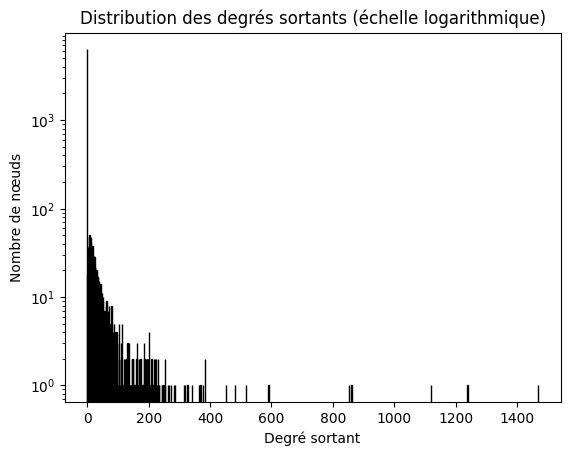

In [62]:
# Calcul du degré sortant moyen
out_degrees = list(dict(G.out_degree()).values())
average_out_degree = sum(out_degrees) / len(out_degrees)
median_out_degree = np.median(out_degrees)

print("Le degré sortant moyen est:", average_out_degree)
print("La médiane des degrés sortants est:", median_out_degree)

# Affichage de la distribution des degrés sortants avec une échelle logarithmique
plt.hist(out_degrees, bins=range(max(out_degrees)+2), align='left', edgecolor='black')
plt.xlabel('Degré sortant')
plt.ylabel('Nombre de nœuds')
plt.yscale('log')
plt.title('Distribution des degrés sortants (échelle logarithmique)')
plt.show()

In [63]:
# Filtrer les nœuds ayant au moins une arête sortante
nodes_with_out_edges = [node for node in G.nodes() if G.out_degree(node) > 0]

# Calculer les degrés sortants de ces nœuds
out_degrees = [G.out_degree(node) for node in nodes_with_out_edges]

# Calculer la moyenne des degrés sortants
if out_degrees:  # Vérifier qu'il y a des nœuds avec des arêtes sortantes
    average_out_degree = sum(out_degrees) / len(out_degrees)
else:
    average_out_degree = 0

print("Degré sortant moyen des nœuds avec au moins une arête sortante:", average_out_degree)


Degré sortant moyen des nœuds avec au moins une arête sortante: 46.12720156555773


In [64]:
# 1. Déterminer tous les nœuds ayant un degré sortant supérieur à 60
nodes_high_out_degree = [node for node in G.nodes() if G.out_degree(node) > 100]

# 2. Calculer le nombre total d'emails envoyés par ces nœuds (somme des poids des arêtes sortantes)
total_emails_high_out_degree = sum(G.out_degree(node, weight='weight') for node in nodes_high_out_degree)

# 3. Sélectionner parmi ces nœuds ceux ayant envoyé plus de 500 emails
selected_nodes = [node for node in nodes_high_out_degree if G.out_degree(node, weight='weight') > 500]

# 4. Pour les nœuds sélectionnés, calculer la somme de l'écart entre la moyenne d'emails envoyés par personne et leur nombre d'emails envoyés
if selected_nodes:
    mean_emails_overall = sum(G.out_degree(node, weight='weight') for node in G.nodes()) / len(G.nodes())
    sum_of_deviations = sum(abs(G.out_degree(node, weight='weight') - mean_emails_overall) for node in selected_nodes)
else:
    sum_of_deviations = 0

# 5. Calculer la réduction d'emails envoyés potentiels (on suppose que les nœuds qui ont envoyé plus de 20 emails en envoient 20 comme les autres)
reduction_potential = sum(G.out_degree(node, weight='weight') - 750 for node in selected_nodes)

print("Nœuds avec un degré sortant supérieur à 100:", nodes_high_out_degree)
print("Nombre total d'emails envoyés par ces nœuds:", total_emails_high_out_degree)
print("Nœuds ayant envoyé plus de 300 emails parmi ceux-ci:", selected_nodes)
print("Somme de l'écart entre la moyenne d'emails envoyés par personne et leur nombre d'emails envoyés:", sum_of_deviations)
print("Réduction potentielle d'emails envoyés:", reduction_potential)

NameError: name 'mean_emails' is not defined

In [ ]:
# Calculer la somme des poids des arêtes entrantes et sortantes pour chaque nœud
in_weight_sums = {}
out_weight_sums = {}
for node in G.nodes():
    in_edges = G.in_edges(node, data='weight')
    out_edges = G.out_edges(node, data='weight')
    in_weight_sum = sum(weight for _, _, weight in in_edges)
    out_weight_sum = sum(weight for _, _, weight in out_edges)
    in_weight_sums[node] = in_weight_sum
    out_weight_sums[node] = out_weight_sum

# Trier les nœuds par la somme des poids des arêtes entrantes et sortantes
top_5_in_nodes = sorted(in_weight_sums.items(), key=lambda x: x[1], reverse=True)[:10]
top_5_out_nodes = sorted(out_weight_sums.items(), key=lambda x: x[1], reverse=True)[:10]

# Fonction pour afficher les nœuds et leurs attributs
def display_nodes_with_attributes(graph, top_nodes, weight_type):
    for node, weight_sum in top_nodes:
        print(f"Node: {node}, Sum of {weight_type} Weights: {weight_sum}")
        for attr, value in graph.nodes[node].items():
            print(f"  {attr}: {value}")
        print()

# Afficher les résultats avec les attributs des nœuds
print("Top 5 Nœuds par Somme des Poids des Arêtes Entrantes:")
display_nodes_with_attributes(G, top_5_in_nodes, "Incoming")

print("\nTop 5 Nœuds par Somme des Poids des Arêtes Sortantes:")
display_nodes_with_attributes(G, top_5_out_nodes, "Outgoing")

Top 5 Nœuds par Somme des Poids des Arêtes Entrantes:
Node: 7221, Sum of Incoming Weights: 2024
  grade: nan

Node: 1070, Sum of Incoming Weights: 1672
  grade: Partner

Node: 1405828, Sum of Incoming Weights: 961
  grade: Partner

Node: 1629, Sum of Incoming Weights: 954
  grade: Director

Node: 1284, Sum of Incoming Weights: 941
  grade: Senior Manager

Node: 1428, Sum of Incoming Weights: 929
  grade: Partner

Node: 1436, Sum of Incoming Weights: 907
  grade: Partner

Node: 1056, Sum of Incoming Weights: 881
  grade: Partner

Node: 13381, Sum of Incoming Weights: 849
  grade: Senior Manager

Node: 1130, Sum of Incoming Weights: 847
  grade: Senior Manager


Top 5 Nœuds par Somme des Poids des Arêtes Sortantes:
Node: 1683, Sum of Outgoing Weights: 4788
  grade: Assistant Manager

Node: 1629, Sum of Outgoing Weights: 2285
  grade: Director

Node: 1331, Sum of Outgoing Weights: 2122
  grade: Partner

Node: 1075, Sum of Outgoing Weights: 2040
  grade: Administrative Staff

Node: 13218, 

In [ ]:
#Centralité de degré : Importance d'un collaborateur basée sur le nombre de connexions directes.
degree_centrality = nx.degree_centrality(G)

#Centralité de proximité : Mesure de l'accessibilité d'un collaborateur aux autres.
#closeness_centrality = nx.closeness_centrality(G)

#Centralité d'intermédiarité : Nombre de fois qu'un collaborateur agit comme intermédiaire dans les communications.
#betweenness_centrality = nx.betweenness_centrality(G)

#print(degree_centrality)
#print(closeness_centrality)
#print(betweenness_centrality)

# Tri et extraction des top 10 nœuds pour chaque mesure de centralité
top_10_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
#top_10_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
#top_10_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Affichage des top 5 nœuds pour chaque mesure de centralité
print("Top 5 Nodes by Degree Centrality:")
for node, centrality in top_10_degree_centrality:
    print(f"Node: {node}, Degree Centrality: {centrality}")


''' 

print("\nTop 5 Nodes by Closeness Centrality:")
for node, centrality in top_10_closeness_centrality:
    print(f"Node: {node}, Closeness Centrality: {centrality}")

print("\nTop 5 Nodes by Betweenness Centrality:")
for node, centrality in top_10_betweenness_centrality:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")

'''

Top 5 Nodes by Degree Centrality:
Node: 1620429, Degree Centrality: 0.19583280071583792
Node: 1629, Degree Centrality: 0.17998210405215392
Node: 1683, Degree Centrality: 0.15237121308960758
Node: 7221, Degree Centrality: 0.13434743704461205
Node: 1331, Degree Centrality: 0.11977502236993481


' \n\nprint("\nTop 5 Nodes by Closeness Centrality:")\nfor node, centrality in top_10_closeness_centrality:\n    print(f"Node: {node}, Closeness Centrality: {centrality}")\n\nprint("\nTop 5 Nodes by Betweenness Centrality:")\nfor node, centrality in top_10_betweenness_centrality:\n    print(f"Node: {node}, Betweenness Centrality: {centrality}")\n\n'

In [ ]:
# Extrait les identifiants des nœuds centraux
top_10_nodes_degree = [node for node, _ in top_10_degree_centrality]
top_10_nodes_closeness = [node for node, _ in top_10_closeness_centrality]
top_10_nodes_betweenness = [node for node, _ in top_10_betweenness_centrality]

# Fonction pour afficher les attributs des nœuds
def display_node_attributes(graph, nodes):
    for node in nodes:
        print(f"Node: {node}")
        for attr, value in graph.nodes[node].items():
            print(f"  {attr}: {value}")
        print()

# Afficher les attributs pour chaque mesure de centralité
print("Attributs des top 10 nœuds par Centralité de Degré:")
display_node_attributes(G, top_10_nodes_degree)

print("Attributs des top 10 nœuds par Centralité de Proximité:")
display_node_attributes(G, top_10_nodes_closeness)

print("Attributs des top 10 nœuds par Centralité d'Intermédiarité:")
display_node_attributes(G, top_10_nodes_betweenness)

Attributs des top 10 nœuds par Centralité de Degré:
Node: 1620429
  grade: Partner

Node: 1629
  grade: Director

Node: 1683
  grade: Assistant Manager

Node: 7221
  grade: nan

Node: 1331
  grade: Partner

Attributs des top 10 nœuds par Centralité de Proximité:
Node: 7221
  grade: nan

Node: 1629
  grade: Director

Node: 6698
  grade: nan

Node: 1428
  grade: Partner

Node: 1405828
  grade: Partner

Attributs des top 10 nœuds par Centralité d'Intermédiarité:
Node: 1331
  grade: Partner

Node: 1629
  grade: Director

Node: 13215
  grade: Staff

Node: 1620429
  grade: Partner

Node: 1683
  grade: Assistant Manager



### Analyse des communautés par "greedy_modularité"

In [65]:
communities = nx.algorithms.community.greedy_modularity_communities(G.to_undirected())
#print("Communities:", [list(c) for c in communities])
print(communities)

[frozenset({16424, 999473, 999474, 8247, 999567, 999571, 999573, 385180, 999585, 999586, 999587, 999588, 999589, 999590, 999591, 999592, 999593, 999594, 999601, 360628, 999605, 999608, 270616, 8476, 1622314, 1622315, 1622317, 16704, 975195, 8571, 16779, 385429, 975301, 975303, 1008072, 975316, 975317, 975318, 975319, 975320, 975323, 975325, 975328, 975332, 975333, 975339, 975340, 975341, 975342, 975356, 188926, 975363, 1008134, 1008139, 1008141, 1008142, 1008143, 385549, 975375, 975378, 975383, 1008151, 1008152, 1008154, 975387, 1008153, 1008155, 1008156, 1008158, 1008159, 1008160, 1008165, 1008168, 1008170, 1008176, 975412, 1589812, 975414, 1589813, 975416, 1008185, 975421, 1589824, 1589825, 975427, 975429, 975430, 1000010, 16972, 975446, 975447, 975449, 975450, 975455, 16996, 344693, 975485, 385670, 975500, 975501, 975507, 975508, 975510, 975518, 17055, 17060, 975525, 975524, 975526, 680, 681, 975530, 682, 684, 685, 686, 975535, 687, 688, 690, 691, 692, 693, 694, 975543, 975544, 695,

In [66]:
nb_communauties = len(communities)
print("Nombre de communautés:", nb_communauties)

Nombre de communautés: 12


In [67]:
diameter = nx.diameter(G.to_undirected())
print("Diameter:", diameter)

Diameter: 6


In [68]:
average_path_length = nx.average_shortest_path_length(G)
print("Average Path Length:", average_path_length)

Average Path Length: 0.6829916706465937


In [69]:
# Calculer les positions des noeuds avec spring_layout
pos = nx.spring_layout(G)

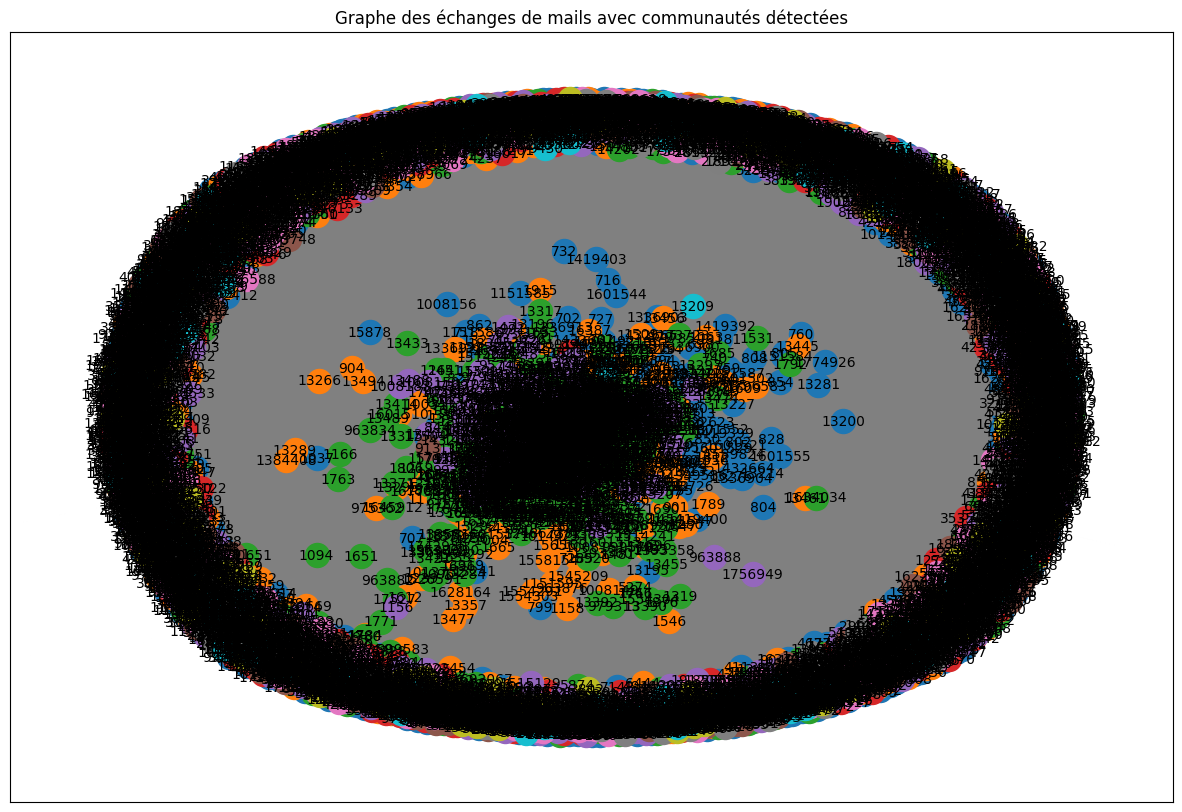

In [70]:
plt.figure(figsize=(15, 10))
colors = plt.get_cmap('tab10')

for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[colors(i)])
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title('Graphe des échanges de mails avec communautés détectées')
plt.show()

C:\Users\souma\AppData\Local\Temp\ipykernel_53708\4084838078.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  selected_nodes = random.sample(G.nodes(), num_nodes)


Communauté 1: [3072, 5889, 1722625, 1628162, 2818, 3075, 1698054, 1601542, 12554, 784, 3091, 788, 1813, 3094, 12564, 3353, 1008155, 2588, 2848, 4641, 15398, 2855, 1399336, 1622317, 2862, 12078, 3121, 817, 6194, 3382, 3128, 4665, 12601, 6970, 1828668, 1336893, 3389, 4414, 1828672, 1774915, 13635, 1645892, 3395, 1645895, 1774921, 1413710, 1336910, 1336912, 1336916, 1645911, 979288, 1151578, 15963, 4188, 12895, 3167, 7266, 4196, 2917, 1438054, 3176, 1354093, 3189, 1405817, 1151610, 1534332, 1496189, 3965, 3198, 1151615, 13695, 2945, 2946, 4227, 13189, 5250, 2949, 1014406, 1419399, 2954, 975500, 1014415, 13711, 2961, 13203, 4243, 2974, 1950, 13215, 999588, 1962, 1620398, 687, 2990, 2991, 2995, 13748, 1839539, 694, 695, 1620407, 13239, 1492411, 702, 1620414, 13759, 1726914, 3014, 710, 3016, 3017, 713, 3277, 719, 1677525, 1620437, 1601497, 3040, 1601505, 1601506, 739, 15594, 1601519, 765, 766]
Communauté 2: [408833, 13185, 386691, 383493, 354183, 387592, 386826, 183691, 423564, 2190, 383247,

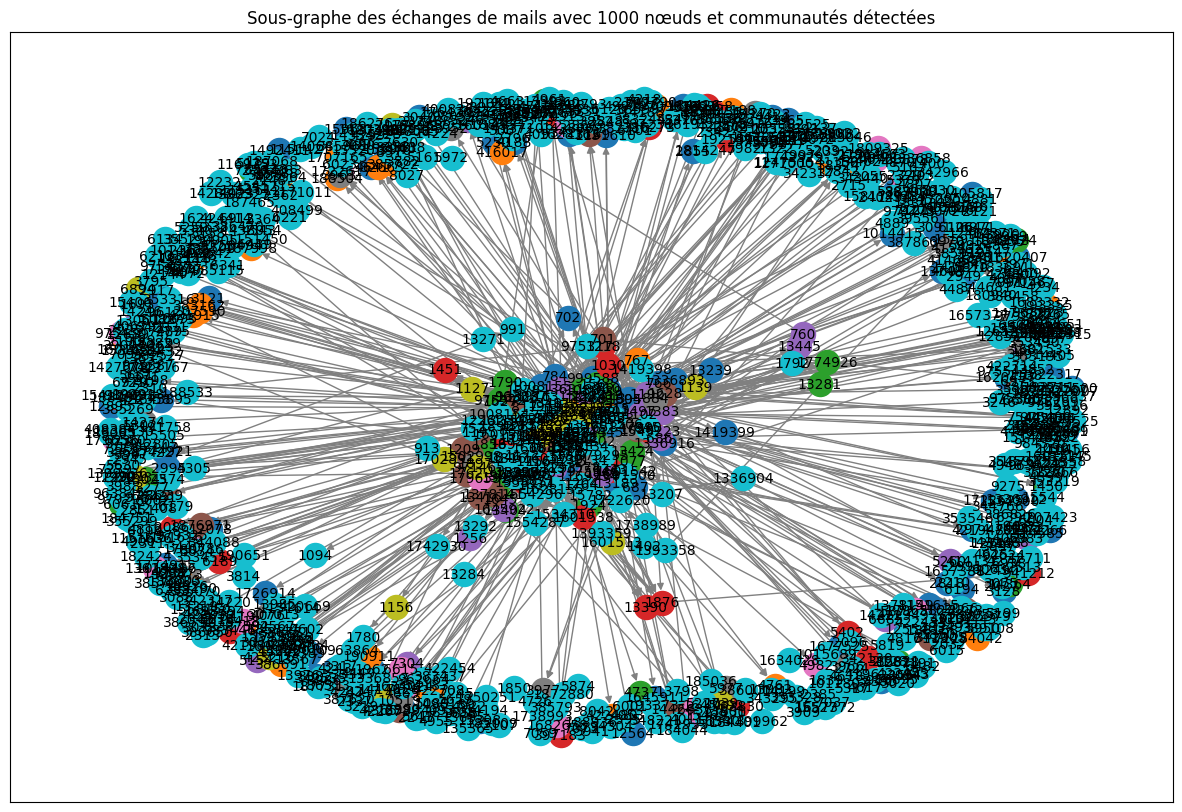

In [71]:
# Sélectionner un nombre défini de nœuds aléatoirement
num_nodes = 1000  # nombre de nœuds que vous souhaitez sélectionner
selected_nodes = random.sample(G.nodes(), num_nodes)

# Créer un sous-graphe basé sur les nœuds sélectionnés
subgraph = G.subgraph(selected_nodes).copy()

# Détection des communautés dans le sous-graphe
G_undirected = subgraph.to_undirected()
communities = nx.algorithms.community.greedy_modularity_communities(G_undirected)

# Afficher les communautés détectées dans le sous-graphe
for i, community in enumerate(communities):
    print(f"Communauté {i + 1}: {list(community)}")

# Visualisation du sous-graphe avec les communautés
#pos = nx.spring_layout(subgraph)
plt.figure(figsize=(15, 10))
colors = plt.get_cmap('tab10')

for i, community in enumerate(communities):
    nx.draw_networkx_nodes(subgraph, pos, nodelist=community, node_color=[colors(i)])
nx.draw_networkx_edges(subgraph, pos, edge_color='gray')
nx.draw_networkx_labels(subgraph, pos, font_size=10)
plt.title(f'Sous-graphe des échanges de mails avec {num_nodes} nœuds et communautés détectées')
plt.show()

## Analyse des communautés en utilisant la méthode de Louvain

In [72]:
# Calcul de la matrice d'adjacence 
adjacency = nx.to_numpy_array(G)

In [1]:
# Importation des bibliothèques pour la détection de communauté

# clustering
from IPython.display import SVG
import numpy as np
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import visualize_graph, visualize_bigraph
from scipy.sparse import csr_matrix

ModuleNotFoundError: No module named 'sknetwork'

In [ ]:
# Détection de communautés en utilisant la méthode de Louvain

louvain = Louvain()
adjacency = csr_matrix(adjacency)
labels = louvain.fit_predict(adjacency)
labels_unique, counts = np.unique(labels, return_counts=True)

# Identifie les clusters à travers des nombres(labels) et donne la taille de chaque communauté
print(labels_unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [3156 2100 1677 1640 1611 1557 1387 1200 1011  983  922  922  856  802
  622  619  571  437  332  323  227  115   31   23]


In [ ]:
get_modularity(adjacency, labels)

0.7620403556179813

In [ ]:
# Create a DataFrame to map nodes to clusters
node_cluster_df = pd.DataFrame({
    'node': list(G.nodes),
    'cluster': labels,
    'grade': [G.nodes[node]['grade'] for node in G.nodes]
})

# Display nodes by cluster and their attributes
clusters = node_cluster_df.groupby('cluster')

cluster_sizes = node_cluster_df['cluster'].value_counts()


In [ ]:
# Trouver le cluster avec le max de gens
max_cluster = cluster_sizes.idxmax()
max_size = cluster_sizes.max()

# Trouver le cluster avec le min de gens
min_cluster = cluster_sizes.idxmin()
min_size = cluster_sizes.min()

# Calculer la moyenne du nombre de personnes par cluster
average_size = cluster_sizes.mean()

# Afficher les résultats
print(f"Cluster avec le plus de gens: Cluster {max_cluster} avec {max_size} personnes")
print(f"Cluster avec le moins de gens: Cluster {min_cluster} avec {min_size} personnes")
print(f"Moyenne du nombre de personnes par cluster: {average_size:.2f}")

In [ ]:
# Ajout des informations sur les mails envoyés et reçus
def calculate_total_emails_sent(node):
    return sum(G[node][neighbor]['weight'] for neighbor in G.neighbors(node))

def calculate_total_emails_received(node):
    return sum(G[neighbor][node]['weight'] for neighbor in G.predecessors(node))

node_cluster_df['total_emails_sent'] = node_cluster_df['node'].apply(calculate_total_emails_sent)
node_cluster_df['total_emails_received'] = node_cluster_df['node'].apply(calculate_total_emails_received)

# Grouper par cluster pour analyser l'intensité des communications
cluster_grouped = node_cluster_df.groupby('cluster').agg({
    'node': 'count',
    'total_emails_sent': 'sum',
    'total_emails_received': 'sum'
}).reset_index()

print("Analyse des clusters :")
print(cluster_grouped)

Analyse des clusters :
    cluster  node  total_emails_sent  total_emails_received
0         0  3156              55594                  50131
1         1  2100              35532                  35859
2         2  1677              10726                  11095
3         3  1640              31320                  31927
4         4  1611              35946                  34986
5         5  1557              35026                  34772
6         6  1387              28305                  25854
7         7  1200              17843                  19289
8         8  1011              17321                  17599
9         9   983              16749                  19274
10       10   922              18737                  18953
11       11   922              13101                  13872
12       12   856              11939                  12222
13       13   802               3710                   3776
14       14   622              22178                  22567
15       15   619

In [ ]:
# Identifier les rôles avec les volumes de mails les plus élevés
role_analysis = node_cluster_df.groupby('grade').agg({
    'total_emails_sent': 'sum',
    'total_emails_received': 'sum'
}).reset_index()

print("Analyse des rôles critiques :")
print(role_analysis)


Analyse des rôles critiques :
                  grade  total_emails_sent  total_emails_received
0  Administrative Staff              21415                   8510
1     Assistant Manager               6202                   1460
2              Director              29792                  20412
3          Junior Staff               6362                   7622
4               Manager              68108                  38090
5               Partner              41540                  32069
6                Senior              73158                  41030
7        Senior Manager              49809                  28243
8                 Staff             113409                  61147
9      Title:[no value]               2444                   1364


Exemple : Etude des mails envoyés par le staff administratif

In [ ]:
# Filtrer les mails envoyés par les "Administrative Staff"
admin_sent_mails = df_envoyes[(df_envoyes['Grade_Collobateur'] == 'Administrative Staff')]

# Grouper les mails par sujet et taille du message
grouped_mails = admin_sent_mails.groupby(['Subject', 'MessSize'])

# Afficher les groupes contenant plus d'un mail (même sujet et même taille)
duplicates = grouped_mails.filter(lambda x: len(x) > 1)

# Afficher les mails avec le même sujet et la même taille
duplicates

In [ ]:
# Compter les occurrences de chaque paire (MessSize, Subject)
most_common_mail = duplicates.groupby(['MessSize', 'Subject']).size().idxmax()

# Afficher le mail le plus commun
print("Mail le plus commun (MessSize, Subject) :", most_common_mail)

In [ ]:
# Compter le nombre de fois que la paire (MessSize, Subject) apparaît dans la table
occurrences = duplicates.groupby(['MessSize', 'Subject']).size().max()

# Afficher le nombre d'occurrences de la paire la plus commune
print("Nombre d'occurrences :", occurrences)

In [ ]:
# Filtrer la table pour les lignes correspondant à cette paire
most_common_df = df_envoyes[(df_envoyes['MessSize'] == most_common_mail[0]) & (df_envoyes['Subject'] == most_common_mail[1])]

# Afficher les destinataires et leurs grades
print("Destinataires et leurs grades pour la paire la plus commune :")
most_common_df[['Id_Interlocuteur', 'Grade_Interlocuteur']]

On remarque que le même mail avec le même contenu a été envoyé par le staff administratif à 187 personnes.

In [ ]:
# Grouper par cluster et par grade pour analyser les statistiques de mails
grade_stats = node_cluster_df.groupby(['cluster', 'grade']).agg({
    'total_emails_sent': 'sum',
    'total_emails_received': 'sum',
    'node': 'count'
}).reset_index()

# Trouver les groupes dominants en termes d'envoi et de réception de mails par cluster
dominant_senders = grade_stats.loc[grade_stats.groupby('cluster')['total_emails_sent'].idxmax()]
dominant_receivers = grade_stats.loc[grade_stats.groupby('cluster')['total_emails_received'].idxmax()]

# Renommer les colonnes pour plus de clarté
dominant_senders.columns = ['cluster', 'grade', 'sum_emails_sent', 'sum_emails_received', 'node_count']
dominant_receivers.columns = ['cluster', 'grade', 'sum_emails_sent', 'sum_emails_received', 'node_count']

print("Groupes qui envoient le plus de mails par cluster :")
print(dominant_senders[['cluster', 'grade', 'sum_emails_sent']])



Groupes qui envoient le plus de mails par cluster :
     cluster             grade  sum_emails_sent
8          0             Staff            14756
14         1           Partner             7642
20         2             Staff             9236
28         3            Senior             7266
36         4           Partner             7542
47         5             Staff            16468
55         6            Senior             9506
62         7           Manager             4489
74         8             Staff             6161
81         9             Staff             4013
88        10             Staff             6517
96        11            Senior             3042
105       12             Staff             3273
109       13             Staff             3262
113       14           Manager             5422
123       15            Senior             5983
134       16             Staff             3549
135       17           Manager             3606
144       18             Staff      

In [ ]:
print("\nGroupes qui reçoivent le plus de mails par cluster :")
print(dominant_receivers[['cluster', 'grade', 'sum_emails_received']])


Groupes qui reçoivent le plus de mails par cluster :
     cluster             grade  sum_emails_received
8          0             Staff                10088
14         1           Partner                 6193
19         2            Senior                 1038
27         3           Partner                 5162
39         4             Staff                 4975
47         5             Staff                11738
55         6            Senior                 4209
64         7            Senior                 1567
74         8             Staff                 3009
77         9           Manager                 2496
88        10             Staff                 2909
98        11             Staff                 1890
105       12             Staff                 2017
108       13            Senior                  272
113       14           Manager                 3451
123       15            Senior                 2861
134       16             Staff                 1615
137       

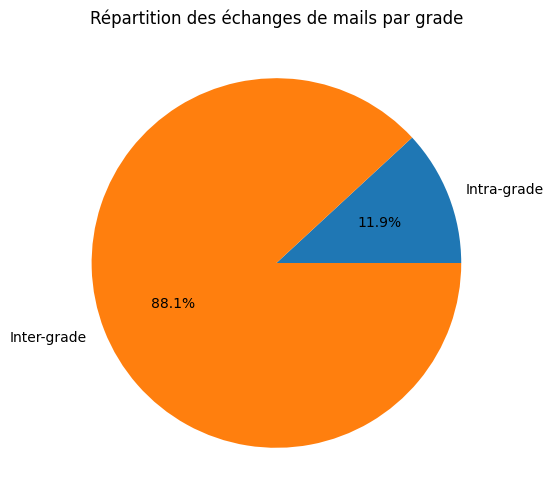

In [ ]:
intra_grade = df_envoyes[df_envoyes['Grade_Collobateur'] == df_envoyes['Grade_Interlocuteur']]
inter_grade = df_envoyes[df_envoyes['Grade_Collobateur'] != df_envoyes['Grade_Interlocuteur']]

# Calcul du nombre de mails intra-grade et inter-grade
intra_grade_count = len(intra_grade)
inter_grade_count = len(inter_grade)

# Visualisation
plt.figure(figsize=(6, 6))
plt.pie([intra_grade_count, inter_grade_count], labels=['Intra-grade', 'Inter-grade'], autopct='%1.1f%%')
plt.title('Répartition des échanges de mails par grade')
plt.show()


## Analyse des communautés en utilisant le clustering

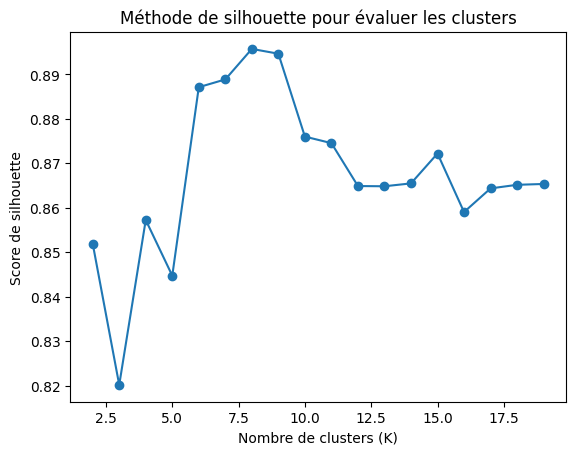

In [75]:
from sklearn.metrics import silhouette_score

X = np.array(list(G.degree))

# Liste des valeurs de K à tester
k_values = range(2, 20)

# Initialiser une liste pour stocker les scores de silhouette
silhouette_scores = []

# Calculer le score de silhouette pour chaque valeur de K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique des scores de silhouette en fonction du nombre de clusters (K)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.title('Méthode de silhouette pour évaluer les clusters')
plt.show()

In [76]:
from sklearn.cluster import KMeans

# Préparation des données pour l'algorithme K-means
X = np.array(list(G.degree))

# Paramètre de l'algorithme K-means (nombre de clusters)
k = 8  

# Création de l'objet K-means et ajustement aux données
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Récupération des étiquettes de cluster attribuées par K-means
labels = kmeans.labels_

# Affichage des résultats
print("Nombre de clusters:", k)
print("Nœuds assignés à chaque cluster:")
for cluster_label in range(k):
    nodes_in_cluster = X[labels == cluster_label]
    print(f"Cluster {cluster_label}: {nodes_in_cluster}")


Nombre de clusters: 8
Nœuds assignés à chaque cluster:
Cluster 0: [[  772   127]
 [  719    75]
 [ 1199    25]
 ...
 [ 5161     1]
 [ 4868     1]
 [85634     1]]
Cluster 1: [[1378156      71]
 [1405828     309]
 [1478279     154]
 [1336921      50]
 [1384412      41]
 [1483518      28]
 [1496852      65]
 [1473771      33]
 [1336887     170]
 [1393362       2]
 [1483514      61]
 [1473777      49]
 [1336888      95]
 [1419394      19]
 [1378145       1]
 [1336903      12]
 [1336911      17]
 [1432666      20]
 [1419402      53]
 [1419398      19]
 [1419399      16]
 [1419401      22]
 [1432664      20]
 [1378141      57]
 [1413725      25]
 [1336900      25]
 [1361897       2]
 [1336926      72]
 [1496849      97]
 [1488036      72]
 [1336892      26]
 [1336908      21]
 [1336897      24]
 [1453337      51]
 [1336913      25]
 [1464002      25]
 [1336943      73]
 [1432665      16]
 [1393358      36]
 [1399372      57]
 [1459567      24]
 [1464004      39]
 [1419395      32]
 [1336901 

In [77]:
# Compter le nombre d'éléments dans chaque cluster
cluster_counts = np.bincount(cluster_labels)

# Afficher le nombre d'éléments dans chaque cluster
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} éléments")

Cluster 0: 308 éléments
Cluster 1: 100 éléments
Cluster 2: 4672 éléments
Cluster 3: 104 éléments
Cluster 4: 193 éléments
Cluster 5: 505 éléments
Cluster 6: 135 éléments
Cluster 7: 109 éléments
Cluster 8: 487 éléments
Cluster 9: 77 éléments
Cluster 10: 178 éléments
Cluster 11: 63 éléments
Cluster 12: 293 éléments
Cluster 13: 81 éléments
Cluster 14: 267 éléments
Cluster 15: 95 éléments
Cluster 16: 19 éléments
Cluster 17: 48 éléments
Cluster 18: 90 éléments


### Modularité des clusters 

In [78]:
A = nx.adjacency_matrix(G).toarray()  # Convertir en matrice d'adjacence
M = A.sum() / 2  # Nombre total de liens

modularité = 0
for i in range(len(G.nodes)):
    for j in range(len(G.nodes)):
        if i != j:
            delta = 1 if labels[i] == labels[j] else 0
            ki = X[i][1]  # degré du noeud i
            kj = X[j][1]  # degré du noeud j
            modularité += (A[i, j] - (ki * kj) / (2 * M)) * delta

modularité /= (2 * M)
print("Modularité: ", modularité)

Modularité:  0.5369477489739535


### Etude des envois et réception des mails aux sein de chaque cluster 

In [79]:
from collections import defaultdict

# Créer un DataFrame pour l'affichage des résultats
df_clusters = pd.DataFrame({'node': [node for node, _ in G.degree()], 'cluster': labels})

# Créer des dictionnaires pour stocker les informations par cluster
cluster_senders = defaultdict(list)
cluster_receivers = defaultdict(list)
cluster_degrees = defaultdict(list)

# Parcourir chaque nœud et ajouter les informations aux dictionnaires
for node in G.nodes():
    cluster = df_clusters[df_clusters['node'] == node]['cluster'].values[0]
    grade = G.nodes[node].get('grade', 'Unknown')
    cluster_senders[cluster].append((node, G.out_degree(node, weight='weight'), grade))
    cluster_receivers[cluster].append((node, G.in_degree(node, weight='weight'), grade))
    cluster_degrees[cluster].append((node, G.degree(node), grade))

# Fonction pour obtenir le top 5 des nœuds selon une métrique
def get_top_n(nodes_list, n=5):
    nodes_list.sort(key=lambda x: x[1], reverse=True)
    return nodes_list[:n]

# Afficher les résultats pour chaque cluster
for cluster in range(k):
    print(f"Cluster {cluster}:")
    print(f"Nombre d'éléments: {len(df_clusters[df_clusters['cluster'] == cluster])}")
    
    top_senders = get_top_n(cluster_senders[cluster])
    top_receivers = get_top_n(cluster_receivers[cluster])
    top_connected = get_top_n(cluster_degrees[cluster])
    
    print("\nTop 5 des nœuds qui envoient le plus de mails:")
    for sender, count, grade in top_senders:
        print(f"Nœud {sender}: {count} mails envoyés (Grade: {grade})")
    
    print("\nTop 5 des nœuds qui reçoivent le plus de mails:")
    for receiver, count, grade in top_receivers:
        print(f"Nœud {receiver}: {count} mails reçus (Grade: {grade})")
    
    print("\nTop 5 des nœuds les plus connectés:")
    for node, count, grade in top_connected:
        print(f"Nœud {node}: {count} connexions totales (Grade: {grade})")
    
    print("\n" + "-"*40 + "\n")

Cluster 0:
Nombre d'éléments: 4729

Top 5 des nœuds qui envoient le plus de mails:
Nœud 1683: 4788 mails envoyés (Grade: Assistant Manager)
Nœud 1629: 2285 mails envoyés (Grade: Director)
Nœud 1331: 2122 mails envoyés (Grade: Partner)
Nœud 1075: 2040 mails envoyés (Grade: Administrative Staff)
Nœud 13218: 1915 mails envoyés (Grade: Staff)

Top 5 des nœuds qui reçoivent le plus de mails:
Nœud 7221: 2024 mails reçus (Grade: nan)
Nœud 1070: 1672 mails reçus (Grade: Partner)
Nœud 1629: 954 mails reçus (Grade: Director)
Nœud 1284: 941 mails reçus (Grade: Senior Manager)
Nœud 1428: 929 mails reçus (Grade: Partner)

Top 5 des nœuds les plus connectés:
Nœud 1629: 1408 connexions totales (Grade: Director)
Nœud 1683: 1192 connexions totales (Grade: Assistant Manager)
Nœud 7221: 1051 connexions totales (Grade: nan)
Nœud 1331: 937 connexions totales (Grade: Partner)
Nœud 13215: 861 connexions totales (Grade: Staff)

----------------------------------------

Cluster 1:
Nombre d'éléments: 279

Top 5

### Connectivité du graph

In [80]:
# Liste des composantes fortement connexes
strongly_connected_components = list(nx.strongly_connected_components(G))

# Affichage des nœuds et de leurs attributs pour chaque composante fortement connexe
for component_index, component in enumerate(strongly_connected_components, 1):
    print(f"Composante fortement connexe {component_index}:")
    for node in component:
        print(f"Nœud : {node}, Attributs : {G.nodes[node]}")
    print("\n")

Composante fortement connexe 1:
Nœud : 4806, Attributs : {'grade': nan}


Composante fortement connexe 2:
Nœud : 5142, Attributs : {'grade': nan}


Composante fortement connexe 3:
Nœud : 4585, Attributs : {'grade': nan}


Composante fortement connexe 4:
Nœud : 4823, Attributs : {'grade': nan}


Composante fortement connexe 5:
Nœud : 5021, Attributs : {'grade': nan}


Composante fortement connexe 6:
Nœud : 4386, Attributs : {'grade': nan}


Composante fortement connexe 7:
Nœud : 3990, Attributs : {'grade': nan}


Composante fortement connexe 8:
Nœud : 1657383, Attributs : {'grade': nan}


Composante fortement connexe 9:
Nœud : 4025, Attributs : {'grade': nan}


Composante fortement connexe 10:
Nœud : 1620400, Attributs : {'grade': nan}


Composante fortement connexe 11:
Nœud : 1589825, Attributs : {'grade': nan}


Composante fortement connexe 12:
Nœud : 5167, Attributs : {'grade': nan}


Composante fortement connexe 13:
Nœud : 4078, Attributs : {'grade': nan}


Composante fortement conn

### Composantes faiblement connectées (Weakly Connected Components) 

In [81]:
# Liste des composantes faiblement connexes
weakly_connected_components = list(nx.weakly_connected_components(G))

# Affichage des nœuds et de leurs attributs pour chaque composante faiblement connexe
for component_index, component in enumerate(weakly_connected_components, 1):
    print(f"Composante faiblement connexe {component_index}:")
    for node in component:
        print(f"Nœud : {node}, Attributs : {G.nodes[node]}")
    print("\n")

Composante faiblement connexe 1:
Nœud : 1015818, Attributs : {'grade': nan}
Nœud : 1015820, Attributs : {'grade': nan}
Nœud : 1015859, Attributs : {'grade': nan}
Nœud : 1015870, Attributs : {'grade': nan}
Nœud : 1738969, Attributs : {'grade': nan}
Nœud : 852109, Attributs : {'grade': nan}
Nœud : 852111, Attributs : {'grade': nan}
Nœud : 852112, Attributs : {'grade': nan}
Nœud : 1343640, Attributs : {'grade': nan}
Nœud : 360628, Attributs : {'grade': nan}
Nœud : 1343733, Attributs : {'grade': nan}
Nœud : 852273, Attributs : {'grade': nan}
Nœud : 983424, Attributs : {'grade': nan}
Nœud : 983446, Attributs : {'grade': nan}
Nœud : 957476, Attributs : {'grade': nan}
Nœud : 957477, Attributs : {'grade': nan}
Nœud : 188963, Attributs : {'grade': nan}
Nœud : 188979, Attributs : {'grade': nan}
Nœud : 361109, Attributs : {'grade': nan}
Nœud : 680, Attributs : {'grade': 'Staff'}
Nœud : 681, Attributs : {'grade': 'Senior'}
Nœud : 682, Attributs : {'grade': 'Senior'}
Nœud : 683, Attributs : {'grade